In [1]:
# set up
import requests 
import bs4
import pandas as pd 
import numpy as np
import time 
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

%xmode Minimal

Exception reporting mode: Minimal


## Page Scraping of Links

In [2]:
# set headers 
my_header_list = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36',
              'Accept-Language': 'en-US,en;q=0.9'}

### Scrape one page

In [17]:
# won't work for page 1 but will work for page 2 or no page (default page 1)
website = 'https://2017-2021.state.gov/remarks-secretary-pompeo/'

In [18]:
server_response = requests.get(website, my_header_list)
server_response

<Response [200]>

In [19]:
soup = bs4.BeautifulSoup(server_response.content, features="html.parser")

In [20]:
results = soup.find_all('li', class_ = 'collection-result') 

In [25]:
results

[<li class="collection-result">
 <!-- add label if a report custom post in inculded in collection-->
 <p class="collection-result__date">Interview</p>
 <a class="collection-result__link" href="https://2017-2021.state.gov/secretary-michael-r-pompeo-with-john-roberts-of-fox-news-america-reports/">
 
 		Secretary Michael R. Pompeo With John Roberts of Fox News America Reports
 	</a>
 <div class="collection-result-meta">
 <span>Michael R. Pompeo</span>
 <span>January 19, 2021</span>
 <!--audience defaults to hidden, only show if switch is on-->
 <span>Via Teleconference</span>
 </div>
 </li>,
 <li class="collection-result">
 <!-- add label if a report custom post in inculded in collection-->
 <p class="collection-result__date">Press Statement</p>
 <a class="collection-result__link" href="https://2017-2021.state.gov/determination-of-the-secretary-of-state-on-atrocities-in-xinjiang/">
 
 		Determination of the Secretary of State on Atrocities in Xinjiang
 	</a>
 <div class="collection-result

In [48]:
results_list = [{'title': i.find('a', class_ = 'collection-result__link').text,
                 'source': i.find_all('span')[0].text, # differs from blinken's site 
                 'date': i.find_all('span')[1].text,  # differs from blinken's site
                 'type_of_release': i.find('p', class_ = 'collection-result__date').text,
                 'link': i.find('a', class_ = 'collection-result__link')['href']} for i in results]

In [117]:
results_list

[{'title': '\n\n\t\tSecretary Michael R. Pompeo With John Roberts of Fox News America Reports\n\t',
  'source': 'Michael R. Pompeo',
  'date': 'January 19, 2021',
  'type_of_release': 'Interview',
  'link': 'https://2017-2021.state.gov/secretary-michael-r-pompeo-with-john-roberts-of-fox-news-america-reports/'},
 {'title': '\n\n\t\tDetermination of the Secretary of State on Atrocities in Xinjiang\n\t',
  'source': 'Michael R. Pompeo',
  'date': 'January 19, 2021',
  'type_of_release': 'Press Statement',
  'link': 'https://2017-2021.state.gov/determination-of-the-secretary-of-state-on-atrocities-in-xinjiang/'},
 {'title': '\n\n\t\tThe United States Takes Further Action Against Enablers of Venezuelan Oil Transactions, Including Sanctions Evasion Network\n\t',
  'source': 'Michael R. Pompeo',
  'date': 'January 19, 2021',
  'type_of_release': 'Press Statement',
  'link': 'https://2017-2021.state.gov/the-united-states-takes-further-action-against-enablers-of-venezuelan-oil-transactions-incl

In [118]:
df_1 = pd.DataFrame.from_dict(results_list)
df_1['title'] = [i.strip() for i in df_1.title] # because original output has weird 
df_1['content'] = np.nan

In [119]:
df_1.head()

,title,source,date,type_of_release,link,content
0,Secretary Michael R. Pompeo With John Roberts ...,Michael R. Pompeo,"January 19, 2021",Interview,https://2017-2021.state.gov/secretary-michael-...,NaN
1,Determination of the Secretary of State on Atr...,Michael R. Pompeo,"January 19, 2021",Press Statement,https://2017-2021.state.gov/determination-of-t...,NaN
2,The United States Takes Further Action Against...,Michael R. Pompeo,"January 19, 2021",Press Statement,https://2017-2021.state.gov/the-united-states-...,NaN
3,Visa Restrictions on Tanzanians for Underminin...,Michael R. Pompeo,"January 19, 2021",Press Statement,https://2017-2021.state.gov/visa-restrictions-...,NaN
4,Arrest of Aleksey Navalny,Michael R. Pompeo,"January 17, 2021",Press Statement,https://2017-2021.state.gov/arrest-of-aleksey-...,NaN


### Scrape many pages

In [54]:
# define webpage scraping 
def scrape_dos_pompeo(website, headers):
    server_response = requests.get(website, headers)
    time.sleep(5)
    soup = bs4.BeautifulSoup(server_response.content, features="html.parser")
    results = soup.find_all('li', class_ = 'collection-result') 
    results_list = [{'title': i.find('a', class_ = 'collection-result__link').text,
                 'source': i.find_all('span')[0].text,
                 'date': i.find_all('span')[1].text, 
                 'type_of_release': i.find('p', class_ = 'collection-result__date').text,
                'link': i.find('a', class_ = 'collection-result__link')['href']} for i in results]
    df = pd.DataFrame.from_dict(results_list)
    df['title'] = [i.strip() for i in df.title] # because original output has weird 
    df['content'] = np.nan
    return df

In [120]:
# try for pages 2-10

df_list=[]

for i in range(2,11):
    try: 
        df = scrape_dos_pompeo(f'https://2017-2021.state.gov/remarks-secretary-pompeo/page/{i}/', my_header_list)
        df['page_scraped'] = i 
        df_list.append(df)
    except Exception as e:
        print(f'Error: {e} at page {i}')

Error: list index out of range at page 4


In [121]:
df_list

[                                               title             source  \
 0  Imposing Sanctions Related to the Islamic Repu...  Michael R. Pompeo   
 1  Imposing Sanctions on Iranian Entities for Act...  Michael R. Pompeo   
 2  Protecting and Preserving a Free and Open Sout...  Michael R. Pompeo   
 3      10th Anniversary of the Revolution in Tunisia  Michael R. Pompeo   
 4  The United States Targets Foundations Controll...  Michael R. Pompeo   
 5                            The Iran-al-Qa’ida Axis  Michael R. Pompeo   
 6  United States Takes Action To Counter Iranian ...  Michael R. Pompeo   
 7  Secretary Michael R. Pompeo With Hugh Hewitt o...  Michael R. Pompeo   
 8  Secretary Michael R. Pompeo Hoover Institution...  Michael R. Pompeo   
 9             Reclaiming America’s Voice for Freedom  Michael R. Pompeo   
 
                date  type_of_release  \
 0  January 15, 2021  Press Statement   
 1  January 15, 2021  Press Statement   
 2  January 14, 2021  Press Statement  

In [122]:
combined = pd.concat(df_list, ignore_index = True)

In [123]:
combined_df = pd.concat([df_1, combined], ignore_index=True)

In [124]:
combined_df.head()

,title,source,date,type_of_release,link,content,page_scraped
0,Secretary Michael R. Pompeo With John Roberts ...,Michael R. Pompeo,"January 19, 2021",Interview,https://2017-2021.state.gov/secretary-michael-...,NaN,NaN
1,Determination of the Secretary of State on Atr...,Michael R. Pompeo,"January 19, 2021",Press Statement,https://2017-2021.state.gov/determination-of-t...,NaN,NaN
2,The United States Takes Further Action Against...,Michael R. Pompeo,"January 19, 2021",Press Statement,https://2017-2021.state.gov/the-united-states-...,NaN,NaN
3,Visa Restrictions on Tanzanians for Underminin...,Michael R. Pompeo,"January 19, 2021",Press Statement,https://2017-2021.state.gov/visa-restrictions-...,NaN,NaN
4,Arrest of Aleksey Navalny,Michael R. Pompeo,"January 17, 2021",Press Statement,https://2017-2021.state.gov/arrest-of-aleksey-...,NaN,NaN


In [125]:
combined_df.page_scraped.unique()
# need to redo page 4 

array([nan,  2.,  3.,  5.,  6.,  7.,  8.,  9., 10.])

In [126]:
# safety 
combined_df.to_csv('pompeo_backup.csv')

In [127]:
df_list=[]

for i in range(11,101):
    try: 
        df = scrape_dos_pompeo(f'https://2017-2021.state.gov/remarks-secretary-pompeo/page/{i}/', my_header_list)
        df['page_scraped'] = i 
        df_list.append(df)
    except Exception as e:
        print(f'Error: {e} at page {i}')
        
# need to retry page 22
#Error: 'NoneType' object has no attribute 'text' at page 22

Error: 'NoneType' object has no attribute 'text' at page 22


In [128]:
combined2 = pd.concat(df_list, ignore_index = True)

In [129]:
combined_df2 = pd.concat([combined_df, combined2], ignore_index=True)

In [130]:
combined_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            980 non-null    object 
 1   source           980 non-null    object 
 2   date             980 non-null    object 
 3   type_of_release  980 non-null    object 
 4   link             980 non-null    object 
 5   content          0 non-null      float64
 6   page_scraped     970 non-null    float64
dtypes: float64(2), object(5)
memory usage: 53.7+ KB


In [131]:
combined_df2.head()

,title,source,date,type_of_release,link,content,page_scraped
0,Secretary Michael R. Pompeo With John Roberts ...,Michael R. Pompeo,"January 19, 2021",Interview,https://2017-2021.state.gov/secretary-michael-...,NaN,NaN
1,Determination of the Secretary of State on Atr...,Michael R. Pompeo,"January 19, 2021",Press Statement,https://2017-2021.state.gov/determination-of-t...,NaN,NaN
2,The United States Takes Further Action Against...,Michael R. Pompeo,"January 19, 2021",Press Statement,https://2017-2021.state.gov/the-united-states-...,NaN,NaN
3,Visa Restrictions on Tanzanians for Underminin...,Michael R. Pompeo,"January 19, 2021",Press Statement,https://2017-2021.state.gov/visa-restrictions-...,NaN,NaN
4,Arrest of Aleksey Navalny,Michael R. Pompeo,"January 17, 2021",Press Statement,https://2017-2021.state.gov/arrest-of-aleksey-...,NaN,NaN


In [132]:
combined_df2.tail()

,title,source,date,type_of_release,link,content,page_scraped
975,Secretary Michael R. Pompeo With Dillon Burrou...,Michael R. Pompeo,"December 22, 2019",Interview,https://2017-2021.state.gov/secretary-michael-...,NaN,100.0
976,Russian Federation’s and China’s Veto of UNSCR...,Michael R. Pompeo,"December 21, 2019",Press Statement,https://2017-2021.state.gov/russian-federation...,NaN,100.0
977,Passage of the Caesar Syria Civilian Protectio...,Michael R. Pompeo,"December 20, 2019",Press Statement,https://2017-2021.state.gov/passage-of-the-cae...,NaN,100.0
978,The International Criminal Court Unfairly Targ...,Michael R. Pompeo,"December 20, 2019",Press Statement,https://2017-2021.state.gov/the-international-...,NaN,100.0
979,United States Sanctions Five Malian Individuals,Michael R. Pompeo,"December 20, 2019",Press Statement,https://2017-2021.state.gov/united-states-sanc...,NaN,100.0


In [133]:
combined_df2.to_csv('pompeo1000.csv')

In [134]:
# scrape some more so I can get to october 2019 to compare Oct - Oct 
 
df_list=[]

for i in range(101,121):
    try: 
        df = scrape_dos_pompeo(f'https://2017-2021.state.gov/remarks-secretary-pompeo/page/{i}/', my_header_list)
        df['page_scraped'] = i 
        df_list.append(df)
    except Exception as e:
        print(f'Error: {e} at page {i}')
        
# will need to retry page 103
# Error: list index out of range at page 103

Error: list index out of range at page 103


In [135]:
combined3 = pd.concat(df_list,ignore_index = True)

In [136]:
combined_df3 = pd.concat([combined_df2, combined3], ignore_index = True)

In [137]:
combined_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1170 non-null   object 
 1   source           1170 non-null   object 
 2   date             1170 non-null   object 
 3   type_of_release  1170 non-null   object 
 4   link             1170 non-null   object 
 5   content          0 non-null      float64
 6   page_scraped     1160 non-null   float64
dtypes: float64(2), object(5)
memory usage: 64.1+ KB


In [138]:
combined_df3.tail()

,title,source,date,type_of_release,link,content,page_scraped
1165,Secretary Michael R. Pompeo at the Department ...,Michael R. Pompeo,"September 26, 2019",Remarks,https://2017-2021.state.gov/secretary-michael-...,NaN,120.0
1166,The United States Imposes Sanctions on Chinese...,Michael R. Pompeo,"September 25, 2019",Press Statement,https://2017-2021.state.gov/the-united-states-...,NaN,120.0
1167,Iranian Aggression: The World Awakes,Michael R. Pompeo,"September 25, 2019",Speech,https://2017-2021.state.gov/iranian-aggression...,NaN,120.0
1168,Guinea-Bissau National Day,Michael R. Pompeo,"September 24, 2019",Press Statement,https://2017-2021.state.gov/guinea-bissau-nati...,NaN,120.0
1169,Secretary Michael R. Pompeo at the United Nati...,Michael R. Pompeo,"September 23, 2019",Remarks,https://2017-2021.state.gov/secretary-michael-...,NaN,120.0


In [139]:
combined_df3.to_csv('pompeo1170.csv', index=False)

## Scrape link content

### Test One (based on blinken)

In [141]:
website_link1 = combined_df3.link[0]
website_link1

'https://2017-2021.state.gov/secretary-michael-r-pompeo-with-john-roberts-of-fox-news-america-reports/'

In [142]:
server_response_link1 = requests.get(website_link1) 
server_response_link1 

<Response [200]>

In [143]:
soup_link1 = bs4.BeautifulSoup(server_response_link1.content, features="html.parser")

In [144]:
result = soup_link1.find('div', class_ = 'entry-content').find_all('p')
#result

In [145]:
string_list = [str(i.text) for i in result]
# string_list
string_list_clean = [i.replace(u'\xa0', u' ') for i in string_list]
string_list_clean

['QUESTION:  A Fox News alert now, the United States leveling perhaps the most serious charge a country can face, accusing China in the last hour and a bit of committing genocide and crimes against humanity in its repression of Uyghur Muslims.  Secretary of State Mike Pompeo made the announcement just a short time ago.  He joins us now for an exclusive interview.',
 'Mr. Secretary, good to have you with us.  Let me just read if I could from your statement.  You said, quote, “I have determined that the People’s Republic of China, under the direction and control of the Chinese Communist Party, has committed genocide and crimes against the predominantly Muslim Uyghurs and other ethnic and religious minority groups.”',
 'A very significant declaration, obviously one that China will oppose vigorously, but also one that sort of runs counter to what President Trump’s position has been for the last couple of years.',
 'SECRETARY POMPEO:  Well, John, thanks for having me on.  This is a very ser

In [146]:
result_merged = " ".join(string_list_clean)
result_merged

'QUESTION:  A Fox News alert now, the United States leveling perhaps the most serious charge a country can face, accusing China in the last hour and a bit of committing genocide and crimes against humanity in its repression of Uyghur Muslims.  Secretary of State Mike Pompeo made the announcement just a short time ago.  He joins us now for an exclusive interview. Mr. Secretary, good to have you with us.  Let me just read if I could from your statement.  You said, quote, “I have determined that the People’s Republic of China, under the direction and control of the Chinese Communist Party, has committed genocide and crimes against the predominantly Muslim Uyghurs and other ethnic and religious minority groups.” A very significant declaration, obviously one that China will oppose vigorously, but also one that sort of runs counter to what President Trump’s position has been for the last couple of years. SECRETARY POMPEO:  Well, John, thanks for having me on.  This is a very serious and trag

In [147]:
combined_df3.loc[combined_df3.link == website_link1, 'content'] = result_merged

In [148]:
combined_df3.head()

,title,source,date,type_of_release,link,content,page_scraped
0,Secretary Michael R. Pompeo With John Roberts ...,Michael R. Pompeo,"January 19, 2021",Interview,https://2017-2021.state.gov/secretary-michael-...,"QUESTION: A Fox News alert now, the United St...",NaN
1,Determination of the Secretary of State on Atr...,Michael R. Pompeo,"January 19, 2021",Press Statement,https://2017-2021.state.gov/determination-of-t...,NaN,NaN
2,The United States Takes Further Action Against...,Michael R. Pompeo,"January 19, 2021",Press Statement,https://2017-2021.state.gov/the-united-states-...,NaN,NaN
3,Visa Restrictions on Tanzanians for Underminin...,Michael R. Pompeo,"January 19, 2021",Press Statement,https://2017-2021.state.gov/visa-restrictions-...,NaN,NaN
4,Arrest of Aleksey Navalny,Michael R. Pompeo,"January 17, 2021",Press Statement,https://2017-2021.state.gov/arrest-of-aleksey-...,NaN,NaN


In [149]:
combined_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1170 non-null   object 
 1   source           1170 non-null   object 
 2   date             1170 non-null   object 
 3   type_of_release  1170 non-null   object 
 4   link             1170 non-null   object 
 5   content          1 non-null      object 
 6   page_scraped     1160 non-null   float64
dtypes: float64(1), object(6)
memory usage: 64.1+ KB


### Scrape all content

In [150]:
# define link scraping 
# looks like same process should work, but let's update the def title anyway
def get_link_content_pompeo(link, df, header_list):
    try: 
        # check if content has already been pulled
        result = df.loc[df.link == link, 'content'].notnull().all()
        if result:
            return f'content already existing for {link}' 
        else: 
            try: 
                df['content']
                server_response = requests.get(link, headers = header_list)
                time.sleep(5) # to align with dos robots.txt
                soup_link = bs4.BeautifulSoup(server_response.content, features="html.parser")
                result = soup_link.find('div', class_ = 'entry-content').find_all('p')
                string_result = [str(i.text) for i in result]
                string_result_clean = [i.replace(u'\xa0', u' ') for i in string_result]
                result_merged = " ".join(string_result_clean)
                df.loc[df.link == link, 'content'] = result_merged
                return f"success: content added from {link}"
            except: 
                pass
    except Exception as e: 
        return f"unable to gather content from {link} due to {e}"
    #return df_updated 

In [151]:
for i in combined_df3.link[0:11]:
     get_link_content_pompeo(i, combined_df3, my_header_list)

'content already existing for https://2017-2021.state.gov/secretary-michael-r-pompeo-with-john-roberts-of-fox-news-america-reports/'

'success: content added from https://2017-2021.state.gov/determination-of-the-secretary-of-state-on-atrocities-in-xinjiang/'

'success: content added from https://2017-2021.state.gov/the-united-states-takes-further-action-against-enablers-of-venezuelan-oil-transactions-including-sanctions-evasion-network/'

'success: content added from https://2017-2021.state.gov/visa-restrictions-on-tanzanians-for-undermining-the-democratic-process-and-human-rights/'

'success: content added from https://2017-2021.state.gov/arrest-of-aleksey-navalny/'

'success: content added from https://2017-2021.state.gov/championing-americas-first-freedom/'

'success: content added from https://2017-2021.state.gov/increasing-iran-metals-sanctions-targeting-irans-nuclear-military-and-ballistic-missile-programs-and-the-irgc/'

'success: content added from https://2017-2021.state.gov/ensuring-a-transparent-thorough-investigation-of-covid-19s-origin/'

'success: content added from https://2017-2021.state.gov/designating-prc-and-hong-kong-officials-after-widespread-pro-democracy-arrests-in-hong-kong/'

'success: content added from https://2017-2021.state.gov/united-states-places-global-magnitsky-sanctions-on-the-cuban-ministry-of-interior-and-its-minister/'

'success: content added from https://2017-2021.state.gov/imposing-sanctions-related-to-the-islamic-republic-of-iran-shipping-lines-and-iranian-shipping-entities/'

In [152]:
combined_df3.head()

,title,source,date,type_of_release,link,content,page_scraped
0,Secretary Michael R. Pompeo With John Roberts ...,Michael R. Pompeo,"January 19, 2021",Interview,https://2017-2021.state.gov/secretary-michael-...,"QUESTION: A Fox News alert now, the United St...",NaN
1,Determination of the Secretary of State on Atr...,Michael R. Pompeo,"January 19, 2021",Press Statement,https://2017-2021.state.gov/determination-of-t...,The United States of America has led the world...,NaN
2,The United States Takes Further Action Against...,Michael R. Pompeo,"January 19, 2021",Press Statement,https://2017-2021.state.gov/the-united-states-...,The United States has sanctioned three individ...,NaN
3,Visa Restrictions on Tanzanians for Underminin...,Michael R. Pompeo,"January 19, 2021",Press Statement,https://2017-2021.state.gov/visa-restrictions-...,"Today, the United States is announcing visa re...",NaN
4,Arrest of Aleksey Navalny,Michael R. Pompeo,"January 17, 2021",Press Statement,https://2017-2021.state.gov/arrest-of-aleksey-...,The United States strongly condemns Russia’s d...,NaN


In [153]:
#run for rest 
for i in combined_df3.link:
    get_link_content_pompeo(i, combined_df3, my_header_list)

'content already existing for https://2017-2021.state.gov/secretary-michael-r-pompeo-with-john-roberts-of-fox-news-america-reports/'

'content already existing for https://2017-2021.state.gov/determination-of-the-secretary-of-state-on-atrocities-in-xinjiang/'

'content already existing for https://2017-2021.state.gov/the-united-states-takes-further-action-against-enablers-of-venezuelan-oil-transactions-including-sanctions-evasion-network/'

'content already existing for https://2017-2021.state.gov/visa-restrictions-on-tanzanians-for-undermining-the-democratic-process-and-human-rights/'

'content already existing for https://2017-2021.state.gov/arrest-of-aleksey-navalny/'

'content already existing for https://2017-2021.state.gov/championing-americas-first-freedom/'

'content already existing for https://2017-2021.state.gov/increasing-iran-metals-sanctions-targeting-irans-nuclear-military-and-ballistic-missile-programs-and-the-irgc/'

'content already existing for https://2017-2021.state.gov/ensuring-a-transparent-thorough-investigation-of-covid-19s-origin/'

'content already existing for https://2017-2021.state.gov/designating-prc-and-hong-kong-officials-after-widespread-pro-democracy-arrests-in-hong-kong/'

'content already existing for https://2017-2021.state.gov/united-states-places-global-magnitsky-sanctions-on-the-cuban-ministry-of-interior-and-its-minister/'

'content already existing for https://2017-2021.state.gov/imposing-sanctions-related-to-the-islamic-republic-of-iran-shipping-lines-and-iranian-shipping-entities/'

'success: content added from https://2017-2021.state.gov/imposing-sanctions-on-iranian-entities-for-activities-related-to-conventional-arms-proliferation/'

'success: content added from https://2017-2021.state.gov/protecting-and-preserving-a-free-and-open-south-china-sea/'

'success: content added from https://2017-2021.state.gov/10th-anniversary-of-the-revolution-in-tunisia/'

'success: content added from https://2017-2021.state.gov/the-united-states-targets-foundations-controlled-by-irans-supreme-leader/'

'success: content added from https://2017-2021.state.gov/the-iran-al-qaida-axis/'

'success: content added from https://2017-2021.state.gov/united-states-takes-action-to-counter-iranian-support-for-al-qaida/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-hugh-hewitt-of-the-hugh-hewitt-show-8/'

'success: content added from https://2017-2021.state.gov/hoover-institutions-pacific-century-podcast-with-co-hosts-michael-auslin-and-john-yoo/'

'success: content added from https://2017-2021.state.gov/reclaiming-americas-voice-for-freedom/'

'success: content added from https://2017-2021.state.gov/u-s-announces-designation-of-cuba-as-a-state-sponsor-of-terrorism/'

'success: content added from https://2017-2021.state.gov/sanctioning-russia-linked-disinformation-network-for-its-involvement-in-attempts-to-influence-u-s-election/'

'success: content added from https://2017-2021.state.gov/terrorist-designation-of-ansarallah-in-yemen/'

'success: content added from https://2017-2021.state.gov/iran-threatening-to-expel-un-investigators/'

'success: content added from https://2017-2021.state.gov/lifting-self-imposed-restrictions-on-the-u-s-taiwan-relationship/'

'success: content added from https://2017-2021.state.gov/remembering-the-victims-of-ps752/'

'success: content added from https://2017-2021.state.gov/designation-of-iraqi-militia-leader-in-connection-with-serious-human-rights-abuse/'

'success: content added from https://2017-2021.state.gov/on-the-mass-arrests-of-democracy-advocates-in-hong-kong/'

'success: content added from https://2017-2021.state.gov/the-united-states-welcomes-the-breakthrough-to-restore-gulf-and-arab-unity/'

'success: content added from https://2017-2021.state.gov/the-united-states-continues-to-recognize-interim-president-guaido-and-the-last-democratically-elected-national-assembly-in-venezuela/'

'success: content added from https://2017-2021.state.gov/the-united-states-sanctions-venezuelan-officials-involved-in-unjust-sentencing-of-the-citgo-6/'

'success: content added from https://2017-2021.state.gov/on-the-silencing-and-prosecution-of-prc-citizen-journalist-zhang-zhan/'

'success: content added from https://2017-2021.state.gov/protecting-u-s-investors-from-financing-communist-chinese-military-companies/'

'success: content added from https://2017-2021.state.gov/the-ortega-regimes-new-authoritarian-law-undermines-democracy/'

'success: content added from https://2017-2021.state.gov/announcement-of-new-virtual-presence-post-for-western-sahara/'

'success: content added from https://2017-2021.state.gov/imposing-sanctions-and-visa-restrictions-on-additional-individuals-and-entities-undermining-belarusian-democracy/'

'success: content added from https://2017-2021.state.gov/syria-sanctions-designations-on-the-anniversary-of-un-security-council-resolution-2254/'

'success: content added from https://2017-2021.state.gov/israel-lebanon-maritime-negotiations/'

'success: content added from https://2017-2021.state.gov/eric-ueland-designated-authorities-and-functions-of-under-secretary-for-civilian-security-democracy-and-human-rights/'

'success: content added from https://2017-2021.state.gov/on-nathan-saless-service-as-senior-official-under-secretary-of-state-for-civilian-security-democracy-and-human-rights/'

'success: content added from https://2017-2021.state.gov/additional-restrictions-on-the-issuance-of-visas-for-peoples-republic-of-china-officials-engaged-in-human-rights-abuses/'

'success: content added from https://2017-2021.state.gov/additions-of-cuban-military-owned-companies-to-the-specially-designated-nationals-and-blocked-persons-list/'

'success: content added from https://2017-2021.state.gov/the-united-states-sanctions-a-nicaraguan-police-chief-a-member-of-the-nicaraguan-judiciary-and-another-member-of-ortegas-inner-circle/'

'success: content added from https://2017-2021.state.gov/rocket-attack-in-iraq-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-nino-scalia-of-madisons-notes-podcast/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-mark-levin-of-the-mark-levin-show/'

'success: content added from https://2017-2021.state.gov/u-s-imposes-new-sanctions-on-peoples-republic-of-china-actors-linked-to-malign-activities/'

'success: content added from https://2017-2021.state.gov/the-free-worlds-leadership-will-defeat-covid-19/'

'success: content added from https://2017-2021.state.gov/release-of-the-u-s-strategy-to-prevent-conflict-and-promote-stability/'

'success: content added from https://2017-2021.state.gov/the-united-states-takes-actions-against-supporters-of-the-illegitimate-maduro-regimes-fraudulent-elections/'

'success: content added from https://2017-2021.state.gov/qatar-national-day/'

'success: content added from https://2017-2021.state.gov/the-united-states-supports-the-voices-of-the-venezuelan-people/'

'success: content added from https://2017-2021.state.gov/sanctioning-supporters-of-irans-petroleum-and-petrochemical-sectors/'

'success: content added from https://2017-2021.state.gov/bahrain-national-day/'

'success: content added from https://2017-2021.state.gov/bhutan-national-day-4/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-ben-shapiro-of-the-ben-shapiro-show-6/'

'success: content added from https://2017-2021.state.gov/kazakhstan-independence-day/'

'success: content added from https://2017-2021.state.gov/state-department-terrorist-designation-of-saraya-al-mukhtar/'

'success: content added from https://2017-2021.state.gov/russian-influence-in-the-mediterranean/'

'success: content added from https://2017-2021.state.gov/condolences-on-the-passing-of-prime-minister-ambrose-dlamini-of-the-kingdom-of-eswatini/'

'success: content added from https://2017-2021.state.gov/the-united-states-sanctions-turkey-under-caatsa-231/'

'success: content added from https://2017-2021.state.gov/sanctioning-iranian-intelligence-officers-involved-in-the-abduction-of-bob-levinson/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-rob-schmitt-of-wake-up-america-on-newsmax/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-alex-marlow-of-breitbart-news-radio-on-siriusxm-patriot/'

'success: content added from https://2017-2021.state.gov/the-republic-of-kenyas-national-day-3/'

'success: content added from https://2017-2021.state.gov/on-progress-toward-peace/'

'success: content added from https://2017-2021.state.gov/irans-efforts-at-intimidation-must-not-be-rewarded/'

'success: content added from https://2017-2021.state.gov/burkina-fasos-national-day-3/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-tony-perkins-of-washington-watch-with-tony-perkins-4/'

'success: content added from https://2017-2021.state.gov/rebranding-united-states-foreign-assistance/'

'success: content added from https://2017-2021.state.gov/united-states-and-partners-promote-accountability-for-corruption-and-human-rights-abuse/'

'success: content added from https://2017-2021.state.gov/public-designations-of-current-and-former-government-officials-under-section-7031c-of-the-department-of-state-foreign-operations-and-related-programs-appropriations-act-due-to-involvement-in-gross/'

'success: content added from https://2017-2021.state.gov/the-presidents-national-space-policy/'

'success: content added from https://2017-2021.state.gov/international-human-rights-day/'

'success: content added from https://2017-2021.state.gov/the-chinese-communist-party-on-the-american-campus/'

'success: content added from https://2017-2021.state.gov/president-trumps-executive-order-on-ensuring-access-to-united-states-government-covid-19-vaccines/'

'success: content added from https://2017-2021.state.gov/the-united-states-sanctions-irgc-facilitators-in-iran-and-an-irgc-official-in-yemen/'

'success: content added from https://2017-2021.state.gov/the-united-states-applauds-the-interim-governments-peoples-vote/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-matt-murray-of-the-wall-street-journal-ceo-council/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-guy-benson-of-the-guy-benson-show-3/'

'success: content added from https://2017-2021.state.gov/united-states-takes-action-against-violators-of-religious-freedom-2/'

'success: content added from https://2017-2021.state.gov/designations-of-national-peoples-congress-officials-undermining-the-autonomy-of-hong-kong/'

'success: content added from https://2017-2021.state.gov/the-united-states-condemns-venezuelas-fraudulent-legislative-elections/'

'success: content added from https://2017-2021.state.gov/on-the-eus-adoption-of-a-human-rights-sanctions-framework/'

'success: content added from https://2017-2021.state.gov/finland-national-day-4/'

'success: content added from https://2017-2021.state.gov/u-s-welcomes-first-meeting-of-the-afghanistan-high-council-for-national-reconciliation-leadership-committee/'

'success: content added from https://2017-2021.state.gov/the-kingdom-of-thailands-national-day/'

'success: content added from https://2017-2021.state.gov/termination-of-prc-funded-propaganda-programs/'

'success: content added from https://2017-2021.state.gov/u-s-commends-slovenia-for-designating-hizballah/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-the-iiss-manama-dialogue/'

'success: content added from https://2017-2021.state.gov/u-s-imposes-sanctions-on-peoples-republic-of-china-officials-engaged-in-coercive-influence-activities/'

'success: content added from https://2017-2021.state.gov/on-the-political-persecution-of-hong-kong-democracy-advocates/'

'success: content added from https://2017-2021.state.gov/sanctions-on-iranian-entities-involved-in-chemical-weapons-activities-of-concern/'

'success: content added from https://2017-2021.state.gov/international-day-of-persons-with-disabilities-4/'

'success: content added from https://2017-2021.state.gov/designation-of-lucio-rodriguez-serrano-under-the-foreign-narcotics-kingpin-designation-act/'

'success: content added from https://2017-2021.state.gov/the-united-states-welcomes-major-milestone-in-afghanistan-peace-negotiations/'

'success: content added from https://2017-2021.state.gov/the-united-arab-emirates-national-day/'

'success: content added from https://2017-2021.state.gov/lao-peoples-democratic-republic-national-day-3/'

'success: content added from https://2017-2021.state.gov/designation-of-jhon-fredy-zapata-garzon-under-the-foreign-narcotics-kingpin-designation-act/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-bahraini-foreign-minister-al-zayani-at-the-u-s-bahrain-strategic-dialogue/'

'success: content added from https://2017-2021.state.gov/romania-national-day-1/'

'success: content added from https://2017-2021.state.gov/central-african-republic-national-day-3/'

'success: content added from https://2017-2021.state.gov/u-s-sanctions-ceiec-for-supporting-the-illegitimate-maduro-regimes-efforts-to-undermine-venezuelan-democracy/'

'success: content added from https://2017-2021.state.gov/barbados-independence-day-4/'

'success: content added from https://2017-2021.state.gov/albania-national-day-4/'

'success: content added from https://2017-2021.state.gov/the-united-states-condemns-the-conviction-of-the-citgo-6/'

'success: content added from https://2017-2021.state.gov/new-sanctions-under-the-iran-north-korea-and-syria-nonproliferation-act-inksna-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-bret-baier-of-fox-news-special-report-3/'

'success: content added from https://2017-2021.state.gov/observance-of-international-day-for-the-elimination-of-violence-against-women/'

'success: content added from https://2017-2021.state.gov/suriname-national-day/'

'success: content added from https://2017-2021.state.gov/bosnia-and-herzegovina-national-statehood-day-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-interview-with-bret-baier-of-fox-news-special-report/'

'success: content added from https://2017-2021.state.gov/the-cuban-regimes-cruel-crackdown-on-peaceful-protesters/'

'success: content added from https://2017-2021.state.gov/remarks-at-2020-afghanistan-conference/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-kuwaiti-foreign-minister-sheikh-ahmad-nasser-al-mohammad-al-sabah/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-taher-baraka-of-al-arabiya/'

'success: content added from https://2017-2021.state.gov/on-the-presidential-elections-in-the-republic-of-palau/'

'success: content added from https://2017-2021.state.gov/anniversary-of-the-wrongful-detention-of-the-citgo-6-in-venezuela/'

'success: content added from https://2017-2021.state.gov/lebanon-national-day-4/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-israeli-foreign-minister-gabi-ashkenazi/'

'success: content added from https://2017-2021.state.gov/marking-of-country-of-origin/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-israeli-prime-minister-benjamin-netanyahu/'

'success: content added from https://2017-2021.state.gov/identifying-organizations-engaged-in-anti-semitic-bds-activities/'

'success: content added from https://2017-2021.state.gov/monaco-national-day-3/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-israeli-prime-minister-benjamin-netanyahu-and-bahraini-foreign-minister-abdullatif-bin-rashid-al-zayani-before-their-meeting/'

'success: content added from https://2017-2021.state.gov/commemoration-of-the-massacre-of-mahshahr-and-designation-of-iranian-officials-due-to-involvement-in-gross-violations-of-human-rights/'

'success: content added from https://2017-2021.state.gov/the-importance-of-sanctions-on-iran/'

'success: content added from https://2017-2021.state.gov/oman-national-day/'

'success: content added from https://2017-2021.state.gov/latvia-national-day-4/'

'success: content added from https://2017-2021.state.gov/state-department-designates-two-senior-al-shabaab-leaders-as-terrorists/'

'success: content added from https://2017-2021.state.gov/the-united-states-welcomes-cessation-of-hostilities-between-armenia-and-azerbaijan-and-announces-new-assistance-to-respond-to-the-nagorno-karabakh-humanitarian-emergency/'

'success: content added from https://2017-2021.state.gov/the-united-states-condemns-the-attack-on-eritrea-by-the-tigray-peoples-liberation-front/'

'success: content added from https://2017-2021.state.gov/anniversary-of-protests-in-iran/'

'success: content added from https://2017-2021.state.gov/helicopter-crash-in-egypt/'

'success: content added from https://2017-2021.state.gov/st-vincent-and-the-grenadines-election/'

'success: content added from https://2017-2021.state.gov/disqualification-of-pan-democratic-lawmakers-in-hong-kong/'

'success: content added from https://2017-2021.state.gov/on-the-passing-of-his-royal-highness-prince-khalifa-bin-salman-al-khalifa/'

'success: content added from https://2017-2021.state.gov/political-prisoners-in-belarus-should-be-released/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-hugh-hewitt-of-the-hugh-hewitt-show-7/'

'success: content added from https://2017-2021.state.gov/designation-of-iranian-procurement-networks/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-bret-baier-of-fox-news-special-report-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-tony-perkins-of-washington-watch-with-tony-perkins-3/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-mark-belling-of-the-mark-belling-show/'

'success: content added from https://2017-2021.state.gov/wrongful-detention-by-the-houthis-of-levi-salem-musa-marhabi/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-a-press-availability-16/'

'success: content added from https://2017-2021.state.gov/sint-maarten-national-day/'

'success: content added from https://2017-2021.state.gov/the-promise-of-america/'

'success: content added from https://2017-2021.state.gov/u-s-approves-advanced-defense-capabilities-for-the-united-arab-emirates/'

'success: content added from https://2017-2021.state.gov/coordinator-for-counterterrorism-ambassador-nathan-a-sales-designated-special-envoy-to-the-global-coalition-to-defeat-isis/'

'success: content added from https://2017-2021.state.gov/on-the-departure-of-ambassador-james-f-jeffrey/'

'success: content added from https://2017-2021.state.gov/designations-of-four-prc-and-hong-kong-officials-threatening-the-peace-security-and-autonomy-of-hong-kong/'

'success: content added from https://2017-2021.state.gov/syria-sanctions-designations-on-the-anniversary-of-assads-attack-against-the-people-of-douma-syria/'

'success: content added from https://2017-2021.state.gov/on-u-s-dedication-to-human-rights/'

'success: content added from https://2017-2021.state.gov/burmas-parliamentary-elections/'

'success: content added from https://2017-2021.state.gov/designation-of-former-president-of-nicaragua-aleman-due-to-involvement-in-significant-corruption/'

'success: content added from https://2017-2021.state.gov/cambodia-national-day/'

'success: content added from https://2017-2021.state.gov/condemning-the-assassination-of-abdul-wase-ghafari/'

'success: content added from https://2017-2021.state.gov/the-united-states-designates-corrupt-lebanese-political-leader-gibran-bassil/'

'success: content added from https://2017-2021.state.gov/2020-new-zealand-general-election/'

'success: content added from https://2017-2021.state.gov/osce-moscow-mechanism-report-details-widespread-rights-violations-in-belarus/'

'success: content added from https://2017-2021.state.gov/on-the-41st-anniversary-of-the-u-s-embassy-takeover-in-tehran/'

'success: content added from https://2017-2021.state.gov/panamas-independence-day-4/'

'success: content added from https://2017-2021.state.gov/tonga-national-day/'

'success: content added from https://2017-2021.state.gov/national-day-of-the-federated-states-of-micronesia/'

'success: content added from https://2017-2021.state.gov/arrest-of-eight-pan-democratic-politicians-in-hong-kong/'

'success: content added from https://2017-2021.state.gov/sudan-making-progress/'

'success: content added from https://2017-2021.state.gov/antigua-and-barbudas-national-day/'

'success: content added from https://2017-2021.state.gov/u-s-rescues-american-held-hostage-in-nigeria/'

'success: content added from https://2017-2021.state.gov/united-states-sanctions-entities-related-to-irans-petroleum-industry/'

'success: content added from https://2017-2021.state.gov/unalienable-rights-and-traditions-of-tolerance/'

'success: content added from https://2017-2021.state.gov/arrest-and-detention-of-student-democracy-activists-in-hong-kong-under-the-national-security-law/'

'success: content added from https://2017-2021.state.gov/u-s-citizens-born-in-jerusalem/'

'success: content added from https://2017-2021.state.gov/presidential-determination-on-refugee-admissions-for-fiscal-year-2021/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-indonesian-foreign-minister-retno-marsudi/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-aishath-shaany-of-raajje-tv/'

'success: content added from https://2017-2021.state.gov/public-designation-of-current-and-former-members-of-the-guatemalan-congress-due-to-involvement-in-significant-corruption/'

'success: content added from https://2017-2021.state.gov/designation-of-the-national-association-for-chinas-peaceful-unification-nacpu-as-a-foreign-mission-of-the-prc/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-maldives-foreign-minister-abdulla-shahid-at-a-press-availability/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-prasad-dodangodage-of-rupavahini-tv/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-indeewari-amuwatte-of-derana-tv/'

'success: content added from https://2017-2021.state.gov/release-and-departure-of-u-s-citizen-vitali-shkliarov-from-belarus/'

'success: content added from https://2017-2021.state.gov/on-u-s-intent-to-open-an-embassy-in-maldives/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-sri-lankan-foreign-minister-dinesh-gunawardena-at-a-press-availability/'

'success: content added from https://2017-2021.state.gov/czech-republic-national-day/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-shekhar-gupta-of-the-print/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-rahul-shivshankar-of-times-now/'

'success: content added from https://2017-2021.state.gov/saint-vincent-and-the-grenadines-independence-day/'

'success: content added from https://2017-2021.state.gov/international-religious-freedom-day-4/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-secretary-of-defense-mark-esper-indian-minister-of-defense-rajnath-singh-and-indian-minister-of-external-affairs-subrahmanyam-jaishankar-opening-statements-at-the-u-s/'

'success: content added from https://2017-2021.state.gov/on-the-first-anniversary-of-the-death-of-abu-bakr-al-baghdadi/'

'success: content added from https://2017-2021.state.gov/united-states-sanctions-iranian-energy-institutions-supporting-the-irgc-qf/'

'success: content added from https://2017-2021.state.gov/ceasefire-in-libya/'

'success: content added from https://2017-2021.state.gov/austria-national-day-2/'

'success: content added from https://2017-2021.state.gov/u-s-welcomes-guatemalas-designation-of-hizballah-as-a-terrorist-organization/'

'success: content added from https://2017-2021.state.gov/u-s-welcomes-estonias-action-against-hizballah/'

'success: content added from https://2017-2021.state.gov/removing-cubas-military-from-the-remittance-process/'

'success: content added from https://2017-2021.state.gov/the-united-states-announces-humanitarian-assistance-for-the-crisis-response-in-sudan/'

'success: content added from https://2017-2021.state.gov/zambia-national-day-3/'

'success: content added from https://2017-2021.state.gov/united-states-sanctions-five-iranian-entities-and-watchlists-irgc-cyber-actors-for-interfering-in-our-elections/'

'success: content added from https://2017-2021.state.gov/united-states-sanctions-russian-government-research-institution/'

'success: content added from https://2017-2021.state.gov/at-the-virtual-launch-of-the-inaugural-u-s-uae-strategic-dialogue/'

'success: content added from https://2017-2021.state.gov/on-the-passing-of-former-marshallese-president-litokwa-tomeing/'

'success: content added from https://2017-2021.state.gov/united-states-charges-russian-military-intelligence-officers-for-cyber-crimes/'

'success: content added from https://2017-2021.state.gov/the-united-states-imposes-sanctions-on-chinese-and-hong-kong-persons-for-activities-related-to-supporting-the-islamic-republic-of-iran-shipping-lines/'

'success: content added from https://2017-2021.state.gov/the-united-states-designates-al-qaida-financial-facilitator/'

'success: content added from https://2017-2021.state.gov/meeting-of-the-presidents-interagency-task-force-to-monitor-and-combat-trafficking-in-persons-3/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-the-three-seas-virtual-summit-and-web-forum/'

'success: content added from https://2017-2021.state.gov/status-of-un-arms-embargo-on-iran/'

'success: content added from https://2017-2021.state.gov/on-the-passing-of-former-palau-president-kuniwo-nakamura/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-erick-erickson-of-the-erick-erickson-show-on-wsb-atlanta/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-jayme-west-and-jim-sharpe-of-arizona-morning-news-on-ktar-phoenix/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-paul-w-smith-of-the-paul-w-smith-show-on-wjr-detroit/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-tony-katz-of-the-morning-news-on-wibc-indianapolis/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-bud-hedinger-of-good-morning-orlando-on-wfla-orlando/'

'success: content added from https://2017-2021.state.gov/release-of-american-hostages-held-in-yemen/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-a-press-availability-14/'

'success: content added from https://2017-2021.state.gov/designation-of-a-united-states-special-coordinator-for-tibetan-issues/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-saudi-foreign-minister-prince-faisal-bin-farhan-al-saud-after-their-meeting/'

'success: content added from https://2017-2021.state.gov/america-stands-for-freedom/'

'success: content added from https://2017-2021.state.gov/on-the-un-human-rights-councils-embrace-of-authoritarian-regimes/'

'success: content added from https://2017-2021.state.gov/department-of-state-offers-reward-for-information-to-bring-mexican-transnational-criminal-to-justice/'

'success: content added from https://2017-2021.state.gov/on-transparency-and-foreign-funding-of-u-s-think-tanks/'

'success: content added from https://2017-2021.state.gov/on-the-exile-of-catholic-archbishop-kondrusiewicz/'

'success: content added from https://2017-2021.state.gov/spain-national-day-4/'

'success: content added from https://2017-2021.state.gov/equatorial-guinea-national-day-4/'

'success: content added from https://2017-2021.state.gov/joint-letter-to-state-commissioners-of-education/'

'success: content added from https://2017-2021.state.gov/joint-letter-to-presidents-of-american-institutions-of-higher-education-and-affiliates-regarding-the-peoples-republic-of-china/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-greg-kelly-of-greg-kelly-reports-on-newsmax-tv/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-guy-benson-of-the-guy-benson-show-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-dana-perino-of-the-daily-briefing-on-fox-news/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-larry-oconnor-of-the-larry-oconnor-show-2/'

'success: content added from https://2017-2021.state.gov/curacao-day-4/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-hugh-hewitt-of-the-hugh-hewitt-show-6/'

'success: content added from https://2017-2021.state.gov/the-united-states-sanctions-a-member-of-the-nicaraguan-judiciary-another-member-of-ortegas-inner-circle-and-another-entity/'

'success: content added from https://2017-2021.state.gov/ugandas-independence-day-2/'

'success: content added from https://2017-2021.state.gov/sanctions-on-irans-financial-institutions/'

'success: content added from https://2017-2021.state.gov/fiji-national-day-2/'

'success: content added from https://2017-2021.state.gov/transnational-organized-crime-rewards-program-requests-information-to-bring-venezuelan-national-to-justice/'

'success: content added from https://2017-2021.state.gov/upcoming-elections-in-africa/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-opening-remarks-at-quad-ministerial/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-yoshio-arima-of-nhk/'

'success: content added from https://2017-2021.state.gov/condemning-the-attempt-on-the-life-of-international-woman-of-courage-mayor-zarifa-ghafari/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-remarks-to-traveling-press-1/'

'success: content added from https://2017-2021.state.gov/lesotho-national-day-3/'

'success: content added from https://2017-2021.state.gov/respecting-life-in-americas-foreign-policy/'

'success: content added from https://2017-2021.state.gov/german-national-day-2/'

'success: content added from https://2017-2021.state.gov/the-u-s-action-against-belarusian-individuals-involved-in-efforts-to-undermine-belarusian-democracy/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-briefing-with-the-traveling-press/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-croatian-prime-minister-andrej-plenkovic-at-a-press-availability/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-hrvoje-kresic-of-n1-tv/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-remarks-to-traveling-press-6/'

'success: content added from https://2017-2021.state.gov/guineas-national-day-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-amy-kellogg-of-fox-news/'

'success: content added from https://2017-2021.state.gov/u-s-commends-italy-for-repatriating-its-citizens-from-syria/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-the-mining-agriculture-and-construction-protocol-signing-ceremony/'

'success: content added from https://2017-2021.state.gov/25th-anniversary-of-the-fourth-world-conference-on-women/'

'success: content added from https://2017-2021.state.gov/framework-agreement-for-israel-lebanon-maritime-discussions/'

'success: content added from https://2017-2021.state.gov/independence-day-in-the-republic-of-cyprus-2/'

'success: content added from https://2017-2021.state.gov/the-federal-republic-of-nigerias-independence-day-2/'

'success: content added from https://2017-2021.state.gov/department-of-state-offers-rewards-for-information-to-bring-former-venezuelan-public-officials-to-justice/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-italian-foreign-minister-luigi-di-maio-at-a-press-availability-2/'

'success: content added from https://2017-2021.state.gov/tuvalu-national-day-3/'

'success: content added from https://2017-2021.state.gov/on-the-republic-of-koreas-chuseok-holiday/'

'success: content added from https://2017-2021.state.gov/peoples-republic-of-china-national-day/'

'success: content added from https://2017-2021.state.gov/addition-to-the-specially-designated-nationals-and-blocked-persons-list/'

'success: content added from https://2017-2021.state.gov/syria-sanctions-designations-on-the-anniversary-of-assads-attack-against-the-people-of-armanaz-syria/'

'success: content added from https://2017-2021.state.gov/moral-witness-and-religious-freedom/'

'success: content added from https://2017-2021.state.gov/botswana-national-day-3/'

'success: content added from https://2017-2021.state.gov/our-deepest-condolences-on-the-passing-of-his-highness-sheikh-sabah-al-ahmad-al-sabah/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-christina-kratsi-of-alpha-tv/'

'success: content added from https://2017-2021.state.gov/narcotics-rewards-program-offers-for-information-to-bring-venezuelan-nationals-to-justice/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-greek-prime-minister-kyriakos-mitsotakis-joint-press-statements-after-their-meeting/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-sofia-papadopoulou-of-athens-news-agency/'

'success: content added from https://2017-2021.state.gov/addition-to-the-cuba-restricted-list/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-mark-levin-of-life-liberty-levin/'

'success: content added from https://2017-2021.state.gov/turkmenistan-independence-day-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-larry-oconnor-of-the-larry-oconnor-show-wmal/'

'success: content added from https://2017-2021.state.gov/major-new-human-rights-related-listings-and-accompanying-sanctions-on-iran/'

'success: content added from https://2017-2021.state.gov/the-united-states-announces-humanitarian-assistance-for-the-sahel-crisis-response/'

'success: content added from https://2017-2021.state.gov/the-united-states-announces-new-humanitarian-assistance-for-the-south-sudan-crisis-response/'

'success: content added from https://2017-2021.state.gov/the-united-states-announces-additional-humanitarian-assistance-for-the-syrian-people-2/'

'success: content added from https://2017-2021.state.gov/guinea-bissau-independence-day/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-jason-calvi-of-fox-6-milwaukee/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-eric-franke-of-wisc-tv-channel-3000-madison/'

'success: content added from https://2017-2021.state.gov/secretary-pompeos-video-remarks-at-the-prague-5g-security-conference-2020/'

'success: content added from https://2017-2021.state.gov/promoting-and-protecting-human-rights-a-re-dedication-to-the-universal-declaration-of-human-rights/'

'success: content added from https://2017-2021.state.gov/state-legislatures-and-the-china-challenge/'

'success: content added from https://2017-2021.state.gov/announcement-of-the-cuba-prohibited-accommodations-list/'

'success: content added from https://2017-2021.state.gov/imposing-sanctions-on-entities-and-individuals-advancing-russias-malign-influence/'

'success: content added from https://2017-2021.state.gov/saudi-national-day/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-tony-perkins-of-value-voters-summit/'

'success: content added from https://2017-2021.state.gov/palau-independence-day/'

'success: content added from https://2017-2021.state.gov/the-united-states-sanctions-additional-individuals-involved-in-the-illegitimate-maduro-regimes-attempts-to-corrupt-democratic-elections-in-venezuela/'

'success: content added from https://2017-2021.state.gov/mali-national-day-message-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-felice-friedson-of-the-media-line/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-treasury-secretary-steven-mnuchin-defense-secretary-mark-esper-commerce-secretary-wilbur-ross-u-s-representative-to-the-united-nations-kelly-craft-and-national-sec/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-julian-reichelt-of-bild-tv-2/'

'success: content added from https://2017-2021.state.gov/belizes-independence-day-5/'

'success: content added from https://2017-2021.state.gov/malta-national-day-2/'

'success: content added from https://2017-2021.state.gov/armenian-independence-day-2/'

'success: content added from https://2017-2021.state.gov/keeping-faith-in-the-public-square/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-maria-bartiromo-of-fox-news-sunday-morning-futures-3/'

'success: content added from https://2017-2021.state.gov/the-return-of-un-sanctions-on-the-islamic-republic-of-iran/'

'success: content added from https://2017-2021.state.gov/the-united-states-announces-additional-assistance-to-respond-to-the-venezuela-crisis/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-colombian-president-ivan-duque-after-their-meeting/'

'success: content added from https://2017-2021.state.gov/st-kitts-and-nevis-independence-day-3/'

'success: content added from https://2017-2021.state.gov/department-of-state-offers-reward-for-information-to-bring-colombian-drug-trafficker-to-justice/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-brazilian-foreign-minister-ernesto-araujo-at-a-press-availability/'

'success: content added from https://2017-2021.state.gov/nepali-constitution-day-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-leeron-brummel-of-national-communications-network/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-guyana-president-mohamed-irfaan-ali-at-a-press-availability/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-suriname-president-chandrikapersad-chan-santokhi-at-a-press-availability/'

'success: content added from https://2017-2021.state.gov/chiles-independence-day-2/'

'success: content added from https://2017-2021.state.gov/the-united-states-designates-hizballah-companies-and-official/'

'success: content added from https://2017-2021.state.gov/the-united-states-sanctions-cyber-actors-backed-by-iranian-intelligence-ministry/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-uk-foreign-secretary-dominic-raab-at-a-press-availability/'

'success: content added from https://2017-2021.state.gov/on-yoshihide-sugas-election-as-prime-minister-of-japan/'

'success: content added from https://2017-2021.state.gov/the-united-states-sanctions-russian-nationals-for-phishing-campaign/'

'success: content added from https://2017-2021.state.gov/mexicos-independence-day/'

'success: content added from https://2017-2021.state.gov/the-united-states-condemns-the-ortega-regimes-attack-on-the-free-press/'

'success: content added from https://2017-2021.state.gov/the-united-states-sanctions-chinese-state-owned-entity-for-its-role-in-corruption-in-cambodia/'

'success: content added from https://2017-2021.state.gov/papua-new-guinea-independence-day-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-atlantic-council-president-and-ceo-frederick-kempe/'

'success: content added from https://2017-2021.state.gov/honduras-independence-day/'

'success: content added from https://2017-2021.state.gov/guatemala-independence-day/'

'success: content added from https://2017-2021.state.gov/el-salvador-independence-day/'

'success: content added from https://2017-2021.state.gov/costa-ricas-independence-day-3/'

'success: content added from https://2017-2021.state.gov/sanctions-on-nabah-ltd-owned-or-controlled-by-corrupt-businessman-ashraf-al-cardinal/'

'success: content added from https://2017-2021.state.gov/former-first-lady-of-the-gambia-sanctioned-for-supporting-the-former-presidents-corruption/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-lea-salame-of-france-inter/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-martha-maccallum-of-the-story-with-martha-maccallum/'

'success: content added from https://2017-2021.state.gov/france-should-stand-with-freedom-not-tehran/'

'success: content added from https://2017-2021.state.gov/nicaraguas-independence-day/'

'success: content added from https://2017-2021.state.gov/cbps-continued-enforcement-actions-to-combat-forced-labor-in-china/'

'success: content added from https://2017-2021.state.gov/the-mekong-u-s-partnership-the-mekong-region-deserves-good-partners/'

'success: content added from https://2017-2021.state.gov/international-day-of-democracy-3/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-the-u-s-qatar-strategic-dialogue/'

'success: content added from https://2017-2021.state.gov/u-s-welcomes-serbias-intention-to-designate-hizballah-as-a-terrorist-organization/'

'success: content added from https://2017-2021.state.gov/at-the-cyprus-center-for-land-open-seas-and-port-security-memorandum-of-understanding-signing-ceremony/'

'success: content added from https://2017-2021.state.gov/election-of-mauricio-claver-carone-as-president-of-the-inter-american-development-bank/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-intra-afghan-negotiations-opening-ceremony/'

'success: content added from https://2017-2021.state.gov/the-united-states-expresses-concern-over-hong-kong-democracy-activists-held-in-guangdong-province/'

'success: content added from https://2017-2021.state.gov/historic-agreement-between-israel-and-the-kingdom-of-bahrain/'

'success: content added from https://2017-2021.state.gov/the-enduring-u-s-commitment-to-asean/'

'success: content added from https://2017-2021.state.gov/nineteenth-anniversary-of-the-september-11-2001-terrorist-attacks/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-remarks-to-traveling-press-5/'

'success: content added from https://2017-2021.state.gov/welcoming-the-launch-of-afghanistan-peace-negotiations/'

'success: content added from https://2017-2021.state.gov/united-states-sanctions-russian-actors-and-proxies-for-efforts-to-interfere-in-elections/'

'success: content added from https://2017-2021.state.gov/public-designation-of-andrew-wonplo-due-to-involvement-in-significant-corruption/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-shannon-bream-of-fox-news-night/'

'success: content added from https://2017-2021.state.gov/the-hypocrisy-of-the-prcs-propaganda-system/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-ben-shapiro-of-the-ben-shapiro-show-5/'

'success: content added from https://2017-2021.state.gov/abduction-of-opposition-leaders-in-belarus/'

'success: content added from https://2017-2021.state.gov/the-united-states-designates-former-lebanese-government-ministers/'

'success: content added from https://2017-2021.state.gov/tajikistan-independence-day-4/'

'success: content added from https://2017-2021.state.gov/andorra-national-day-3/'

'success: content added from https://2017-2021.state.gov/north-macedonia-national-day/'

'success: content added from https://2017-2021.state.gov/brazils-independence-day-3/'

'success: content added from https://2017-2021.state.gov/eswatini-independence-day-2/'

'success: content added from https://2017-2021.state.gov/on-the-overdue-release-of-cuban-journalist-roberto-quinones/'

'success: content added from https://2017-2021.state.gov/economic-normalization-between-kosovo-and-serbia/'

'success: content added from https://2017-2021.state.gov/congratulations-on-jamaicas-general-elections/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-steve-doocy-jedediah-bila-and-pete-hegseth-of-fox-friends/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-hugh-hewitt-of-the-hugh-hewitt-show-5/'

'success: content added from https://2017-2021.state.gov/the-united-states-responds-to-the-maduro-regimes-attempts-to-corrupt-democratic-elections-in-venezuela/'

'success: content added from https://2017-2021.state.gov/imposing-sanctions-on-entities-for-engaging-in-transactions-related-to-irans-petroleum-and-petrochemical-industry/'

'success: content added from https://2017-2021.state.gov/recent-developments-in-venezuela/'

'success: content added from https://2017-2021.state.gov/san-marino-national-day-3/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-trey-gowdy-of-the-sean-hannity-show/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-sebastian-gorka-of-america-first-with-sebastian-gorka-2/'

'success: content added from https://2017-2021.state.gov/actions-to-protect-u-s-personnel-from-illegitimate-investigation-by-the-international-criminal-court/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-a-press-availability-12/'

'success: content added from https://2017-2021.state.gov/advancing-reciprocity-in-u-s-china-diplomatic-relations/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-lou-dobbs-of-lou-dobbs-tonight-3/'

'success: content added from https://2017-2021.state.gov/vietnam-national-day-4/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-moroccan-foreign-minister-nasser-bourita-at-the-signing-of-enhanced-immunities-agreement-with-morocco/'

'success: content added from https://2017-2021.state.gov/the-state-department-expands-pickering-and-rangel-graduate-fellowship-programs/'

'success: content added from https://2017-2021.state.gov/citgo-6-surpasses-1000-days-of-wrongful-detention-in-venezuela/'

'success: content added from https://2017-2021.state.gov/on-the-passing-of-former-indian-president-pranab-mukherjee/'

'success: content added from https://2017-2021.state.gov/slovakia-national-day-3/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-vince-coglianese-and-mary-walter-of-wmals-mornings-on-the-mall-radio-show/'

'success: content added from https://2017-2021.state.gov/trinidad-and-tobagos-independence-day/'

'success: content added from https://2017-2021.state.gov/uzbekistan-independence-day-4/'

'success: content added from https://2017-2021.state.gov/kyrgyz-republic-independence-day-3/'

'success: content added from https://2017-2021.state.gov/on-the-resignation-of-prime-minister-of-japan-shinzo-abe/'

'success: content added from https://2017-2021.state.gov/malaysia-independence-day/'

'success: content added from https://2017-2021.state.gov/moldova-national-day-4/'

'success: content added from https://2017-2021.state.gov/womens-equality-day/'

'success: content added from https://2017-2021.state.gov/u-s-imposes-restrictions-on-certain-prc-state-owned-enterprises-and-executives-for-malign-activities-in-the-south-china-sea/'

'success: content added from https://2017-2021.state.gov/on-chinas-continued-coercion-of-the-united-kingdom/'

'success: content added from https://2017-2021.state.gov/designation-of-peoples-republic-of-china-prc-foreign-national-and-hong-kong-entity-under-the-foreign-narcotics-kingpin-designation-act/'

'success: content added from https://2017-2021.state.gov/confirmation-of-reports-on-the-poisoning-of-aleksey-navalny/'

'success: content added from https://2017-2021.state.gov/uruguays-independence-day-3/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-israeli-prime-minister-benjamin-netanyahu-after-their-meeting-2/'

'success: content added from https://2017-2021.state.gov/ukraines-independence-day-2/'

'success: content added from https://2017-2021.state.gov/designations-for-iranian-human-rights-offenders/'

'success: content added from https://2017-2021.state.gov/international-day-of-remembrance-and-tribute-to-the-victims-of-terrorism-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-joe-kernen-and-wilfred-frost-of-cnbcs-squawk-box/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-sandra-smith-of-americas-newsroom-fox-news/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-a-press-availability-11/'

'success: content added from https://2017-2021.state.gov/supporting-the-aspirations-of-the-belarusian-people/'

'success: content added from https://2017-2021.state.gov/syria-sanctions-designations-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-bret-baier-of-special-report-with-bret-baier-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-iraqi-foreign-minister-fuad-hussein-at-a-press-availability/'

'success: content added from https://2017-2021.state.gov/u-s-announces-humanitarian-assistance-for-iraq/'

'success: content added from https://2017-2021.state.gov/the-united-states-designates-mahan-air-facilitators/'

'success: content added from https://2017-2021.state.gov/mutiny-in-mali/'

'success: content added from https://2017-2021.state.gov/on-the-occasion-of-world-humanitarian-day/'

'success: content added from https://2017-2021.state.gov/hungary-national-day-4/'

'success: content added from https://2017-2021.state.gov/statement-by-secretary-michael-r-pompeo-2/'

'success: content added from https://2017-2021.state.gov/second-review-of-the-protecting-life-in-global-health-assistance-policy/'

'success: content added from https://2017-2021.state.gov/afghanistans-independence-day/'

'success: content added from https://2017-2021.state.gov/financial-sanctions-and-visa-restrictions-against-ugandan-individuals-involved-in-corrupt-adoption-scheme/'

'success: content added from https://2017-2021.state.gov/the-united-states-further-restricts-huawei-access-to-u-s-technology/'

'success: content added from https://2017-2021.state.gov/gabon-national-day-3/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-polish-foreign-minister-jacek-czaputowicz-at-a-press-availability/'

'success: content added from https://2017-2021.state.gov/u-s-welcomes-lithuanias-ban-of-hizballah-as-a-terrorist-organization/'

'success: content added from https://2017-2021.state.gov/national-day-of-the-republic-of-the-congo/'

'success: content added from https://2017-2021.state.gov/indian-independence-day-3/'

'success: content added from https://2017-2021.state.gov/on-the-security-councils-failure-to-hold-iran-accountable/'

'success: content added from https://2017-2021.state.gov/liechtenstein-national-day-4/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-andreas-pfeifer-of-orf-tv/'

'success: content added from https://2017-2021.state.gov/secretary-pompeos-meeting-with-greek-foreign-minister-dendias/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-austrian-foreign-minister-alexander-schallenberg-at-a-press-availability/'

'success: content added from https://2017-2021.state.gov/indonesia-national-day-2/'

'success: content added from https://2017-2021.state.gov/u-s-and-concerned-nations-stand-together-for-democratic-change-in-venezuela/'

'success: content added from https://2017-2021.state.gov/eight-year-anniversary-of-the-disappearance-of-austin-tice/'

'success: content added from https://2017-2021.state.gov/pakistan-independence-day-4/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-jure-tepina-of-slovenias-pop-tv/'

'success: content added from https://2017-2021.state.gov/the-united-states-imposes-visa-restrictions-on-multiple-individuals-undermining-sudans-civilian-led-transitional-government/'

'success: content added from https://2017-2021.state.gov/suspension-of-private-charter-flights-between-the-united-states-and-cuba/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-remarks-to-traveling-press-4/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-slovenian-prime-minister-janez-jansa-at-a-press-availability/'

'success: content added from https://2017-2021.state.gov/designation-of-the-confucius-institute-u-s-center-as-a-foreign-mission-of-the-prc/'

'success: content added from https://2017-2021.state.gov/historic-day-for-peace-in-the-middle-east/'

'success: content added from https://2017-2021.state.gov/republic-of-korea-national-day-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-ray-furlong-of-radio-free-europe-radio-liberty/'

'success: content added from https://2017-2021.state.gov/securing-freedom-in-the-heart-of-europe/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-martin-reznicek-of-czech-tv/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-czech-prime-minister-andrej-babis-at-a-press-availability/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-the-thank-you-america-memorial/'

'success: content added from https://2017-2021.state.gov/chads-independence-day/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-sean-spicer-of-newsmax-tvs-spicer-co/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-matt-schlapp-chairman-of-the-american-conservative-union-for-cpac/'

'success: content added from https://2017-2021.state.gov/presidential-elections-in-belarus/'

'success: content added from https://2017-2021.state.gov/ecuadors-national-day-2/'

'success: content added from https://2017-2021.state.gov/russian-decree-targeting-rfe-rl-and-voice-of-america-in-russia/'

'success: content added from https://2017-2021.state.gov/u-s-government-response-to-the-explosion-in-beirut/'

'success: content added from https://2017-2021.state.gov/cote-divoire-independence-day/'

'success: content added from https://2017-2021.state.gov/the-united-states-imposes-sanctions-on-central-african-republic-militia-leader/'

'success: content added from https://2017-2021.state.gov/the-united-states-designates-individuals-in-hong-kong-for-curtailing-promised-freedoms/'

'success: content added from https://2017-2021.state.gov/commemorating-the-30th-anniversary-of-operation-desert-shield/'

'success: content added from https://2017-2021.state.gov/on-the-loya-jirga-in-afghanistan/'

'success: content added from https://2017-2021.state.gov/singapore-national-day/'

'success: content added from https://2017-2021.state.gov/on-the-departure-of-brian-hook/'

'success: content added from https://2017-2021.state.gov/bolivias-independence-day-2/'

'success: content added from https://2017-2021.state.gov/the-53rd-anniversary-of-the-founding-of-the-association-of-southeast-asian-nations/'

'success: content added from https://2017-2021.state.gov/the-united-states-sanctions-network-threatening-the-security-of-libya/'

'success: content added from https://2017-2021.state.gov/jamaicas-independence-day/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-a-press-availability-10/'

'success: content added from https://2017-2021.state.gov/announcing-the-expansion-of-the-clean-network-to-safeguard-americas-assets/'

'success: content added from https://2017-2021.state.gov/u-s-economic-and-humanitarian-assistance-boost-u-s-leadership-in-continued-global-covid-19-response-efforts/'

'success: content added from https://2017-2021.state.gov/the-united-states-imposes-sanctions-on-zimbabwean-businessman-kudakwashe-tagwirei/'

'success: content added from https://2017-2021.state.gov/submission-of-the-second-congressional-report-pursuant-to-the-elie-wiesel-genocide-and-atrocities-prevention-act-of-2018/'

'success: content added from https://2017-2021.state.gov/explosion-in-beirut/'

'success: content added from https://2017-2021.state.gov/on-the-chinese-communist-partys-extra-territorial-authoritarianism/'

'success: content added from https://2017-2021.state.gov/the-passing-of-john-hume/'

'success: content added from https://2017-2021.state.gov/congratulations-on-nigers-60th-independence-day/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-maria-bartiromo-of-fox-news-sunday-morning-futures-2/'

'success: content added from https://2017-2021.state.gov/on-chinas-predatory-fishing-practices-in-the-galapagos/'

'success: content added from https://2017-2021.state.gov/on-the-postponement-of-hong-kongs-legislative-council-elections/'

'success: content added from https://2017-2021.state.gov/benin-independence-day/'

'success: content added from https://2017-2021.state.gov/on-sanctioning-human-rights-abusers-in-xinjiang-china/'

'success: content added from https://2017-2021.state.gov/on-the-occasion-of-eid-al-adha-3/'

'success: content added from https://2017-2021.state.gov/on-the-occasion-of-switzerlands-national-day/'

'success: content added from https://2017-2021.state.gov/on-the-passing-of-former-taiwan-president-lee-teng-hui/'

'success: content added from https://2017-2021.state.gov/expansion-of-the-scope-of-iran-metals-sanctions-targeting-irans-nuclear-military-and-ballistic-missile-programs-and-the-irgc/'

'success: content added from https://2017-2021.state.gov/the-united-states-applauds-the-eus-action-on-cyber-sanctions/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-before-the-senate-foreign-relations-committee-on-the-fiscal-year-2021-state-department-budget-request/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-simon-conway-of-the-joe-pags-show/'

'success: content added from https://2017-2021.state.gov/moroccan-throne-day/'

'success: content added from https://2017-2021.state.gov/vanuatu-national-day-3/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-michael-knowles-of-the-ben-shapiro-show/'

'success: content added from https://2017-2021.state.gov/release-of-the-just-act-report/'

'success: content added from https://2017-2021.state.gov/syria-sanctions-designations/'

'success: content added from https://2017-2021.state.gov/the-united-states-designates-two-isis-facilitators/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-a-press-availability-with-secretary-of-defense-mark-esper-australian-foreign-minister-marise-payne-and-australian-defence-minister-linda-reynolds/'

'success: content added from https://2017-2021.state.gov/perus-independence-day-2/'

'success: content added from https://2017-2021.state.gov/public-designation-of-former-officials-of-the-illegitimate-maduro-regime-due-to-involvement-in-significant-corruption/'

'success: content added from https://2017-2021.state.gov/celebrating-the-231st-anniversary-of-the-u-s-department-of-state/'

'success: content added from https://2017-2021.state.gov/30th-anniversary-of-the-americans-with-disabilities-act/'

'success: content added from https://2017-2021.state.gov/on-the-occasion-of-liberias-independence-day/'

'success: content added from https://2017-2021.state.gov/maldivian-independence-day-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-martha-maccallum-on-the-story-with-martha-maccallum-on-fox-news/'

'success: content added from https://2017-2021.state.gov/communist-china-and-the-free-worlds-future/'

'success: content added from https://2017-2021.state.gov/u-s-sanctions-moron-brothers-for-their-role-in-regime-corruption/'

'success: content added from https://2017-2021.state.gov/message-on-the-80th-anniversary-of-the-welles-declaration/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-johannes-langkilde-of-dr1/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-a-press-availability-with-danish-foreign-minister-jeppe-kofod/'

'success: content added from https://2017-2021.state.gov/transnational-organized-crime-rewards-program-offer-for-information-to-bring-ukrainian-nationals-to-justice/'

'success: content added from https://2017-2021.state.gov/the-state-department-takes-action-and-calls-for-information-to-bring-venezuelan-national-maikel-jose-moreno-perez-to-justice/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-british-foreign-secretary-dominic-raab-at-a-press-availability/'

'success: content added from https://2017-2021.state.gov/belgium-national-day-4/'

'success: content added from https://2017-2021.state.gov/21st-anniversary-of-the-prc-governments-persecution-of-falun-gong/'

'success: content added from https://2017-2021.state.gov/public-designation-of-russian-national-ramzan-kadyrov-due-to-involvement-in-gross-violations-of-human-rights/'

'success: content added from https://2017-2021.state.gov/colombias-independence-day-2/'

'success: content added from https://2017-2021.state.gov/my-faith-my-work-my-country/'

'success: content added from https://2017-2021.state.gov/the-united-states-sanctions-two-individuals-and-two-entities-related-to-corruption-in-nicaragua/'

'success: content added from https://2017-2021.state.gov/european-court-of-justice-invalidates-eu-u-s-privacy-shield/'

'success: content added from https://2017-2021.state.gov/designation-of-prc-foreign-nationals-and-entities-under-the-foreign-narcotics-kingpin-designation-act/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-bill-hemmer-of-fox-news/'

'success: content added from https://2017-2021.state.gov/unalienable-rights-and-the-securing-of-freedom/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-simon-conway-of-the-simon-conway-show/'

'success: content added from https://2017-2021.state.gov/pan-american-health-organization-transparency/'

'success: content added from https://2017-2021.state.gov/on-the-presidents-announcement-on-hong-kong/'

'success: content added from https://2017-2021.state.gov/remarks-to-the-economic-club-of-new-york/'

'success: content added from https://2017-2021.state.gov/the-united-states-imposes-sanctions-on-russian-financiers-global-sanctions-evasion-network/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-bob-cusack-editor-in-chief-of-the-hill/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-a-press-availability-9/'

'success: content added from https://2017-2021.state.gov/the-united-states-and-six-member-states-of-tftc-target-isis-linked-financial-network/'

'success: content added from https://2017-2021.state.gov/u-s-department-of-state-imposes-visa-restrictions-on-guyanese-individuals-undermining-democracy/'

'success: content added from https://2017-2021.state.gov/new-humanitarian-and-health-assistance-bolsters-u-s-leadership-in-response-to-covid-19/'

'success: content added from https://2017-2021.state.gov/u-s-imposes-visa-restrictions-on-certain-employees-of-chinese-technology-companies-that-abuse-human-rights/'

'success: content added from https://2017-2021.state.gov/welcoming-the-united-kingdom-decision-to-prohibit-huawei-from-5g-networks/'

'success: content added from https://2017-2021.state.gov/on-the-pan-democratic-primary-election-in-hong-kong/'

'success: content added from https://2017-2021.state.gov/on-the-occasion-of-frances-national-day-2/'

'success: content added from https://2017-2021.state.gov/u-s-position-on-maritime-claims-in-the-south-china-sea/'

'success: content added from https://2017-2021.state.gov/montenegro-statehood-day/'

'success: content added from https://2017-2021.state.gov/sao-tome-and-principe-national-day-2/'

'success: content added from https://2017-2021.state.gov/2020-singapore-general-election/'

'success: content added from https://2017-2021.state.gov/commemorating-the-25th-anniversary-of-diplomatic-relations-between-the-united-states-and-the-socialist-republic-of-vietnam/'

'success: content added from https://2017-2021.state.gov/the-bahamas-independence-day/'

'success: content added from https://2017-2021.state.gov/un-special-rapporteur-gives-more-cause-to-distrust-un-human-rights-mechanisms/'

'success: content added from https://2017-2021.state.gov/on-the-passing-of-prime-minister-amadou-gon-coulibaly/'

'success: content added from https://2017-2021.state.gov/kiribati-national-day-3/'

'success: content added from https://2017-2021.state.gov/argentinas-independence-day-4/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-a-press-briefing-on-current-u-s-foreign-policy/'

'success: content added from https://2017-2021.state.gov/the-united-states-imposes-sanctions-and-visa-restrictions-in-response-to-the-ongoing-human-rights-violations-and-abuses-in-xinjiang/'

'success: content added from https://2017-2021.state.gov/south-sudan-national-day-3/'

'success: content added from https://2017-2021.state.gov/five-years-of-injustice-following-chinas-709-crackdown/'

'success: content added from https://2017-2021.state.gov/mongolia-national-day-3/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-a-press-availability-8/'

'success: content added from https://2017-2021.state.gov/implementing-visa-restrictions-under-the-reciprocal-access-to-tibet-act/'

'success: content added from https://2017-2021.state.gov/passing-of-lorne-craner-former-assistant-secretary-of-state-for-the-bureau-of-democracy-human-rights-and-labor/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-laura-ingraham-of-fox-news-3/'

'success: content added from https://2017-2021.state.gov/on-the-ccps-orwellian-censorship-on-hong-kong/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-tony-perkins-of-washington-watch-4/'

'success: content added from https://2017-2021.state.gov/on-the-united-kingdoms-establishment-of-a-global-human-rights-sanctions-regime/'

'success: content added from https://2017-2021.state.gov/malawi-national-day-4/'

'success: content added from https://2017-2021.state.gov/comoros-national-day-4/'

'success: content added from https://2017-2021.state.gov/algerian-independence-day-2/'

'success: content added from https://2017-2021.state.gov/cabo-verde-national-day/'

'success: content added from https://2017-2021.state.gov/solomon-islands-national-day%e2%80%af/'

'success: content added from https://2017-2021.state.gov/marking-the-birth-of-our-great-nation/'

'success: content added from https://2017-2021.state.gov/venezuelas-national-day/'

'success: content added from https://2017-2021.state.gov/belarus-national-day-3/'

'success: content added from https://2017-2021.state.gov/secretary-of-state-michael-r-pompeo-with-bret-baier-of-fox-news-special-report/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-a-press-availability-7/'

'success: content added from https://2017-2021.state.gov/entry-into-force-of-the-united-states-mexico-canada-agreement/'

'success: content added from https://2017-2021.state.gov/the-status-of-the-hagia-sophia/'

'success: content added from https://2017-2021.state.gov/issuance-of-the-xinjiang-supply-chain-business-advisory/'

'success: content added from https://2017-2021.state.gov/burundi-independence-day/'

'success: content added from https://2017-2021.state.gov/somalia-national-day-4/'

'success: content added from https://2017-2021.state.gov/on-the-occasion-of-the-rwanda-national-day/'

'success: content added from https://2017-2021.state.gov/on-beijings-imposition-of-national-security-legislation-on-hong-kong/'

'success: content added from https://2017-2021.state.gov/canada-day-4/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-the-un-security-council-on-the-iran-arms-embargo/'

'success: content added from https://2017-2021.state.gov/the-united-states-announces-additional-humanitarian-assistance-for-the-syrian-people/'

'success: content added from https://2017-2021.state.gov/on-the-occasion-of-the-democratic-republic-of-the-congo-national-day/'

'success: content added from https://2017-2021.state.gov/on-chinas-threats-to-impose-visa-restrictions-on-u-s-officials/'

'success: content added from https://2017-2021.state.gov/seychelles-national-day-4/'

'success: content added from https://2017-2021.state.gov/u-s-government-ending-controlled-defense-exports-to-hong-kong/'

'success: content added from https://2017-2021.state.gov/on-chinas-coercive-family-planning-and-forced-sterilization-program-in-xinjiang/'

'success: content added from https://2017-2021.state.gov/on-the-occasion-of-the-republic-of-djiboutis-national-day/'

'success: content added from https://2017-2021.state.gov/u-s-department-of-state-imposes-visa-restrictions-on-chinese-communist-party-officials-for-undermining-hong-kongs-high-degree-of-autonomy-and-restricting-human-rights/'

'success: content added from https://2017-2021.state.gov/madagascar-national-day-4/'

'success: content added from https://2017-2021.state.gov/at-the-2020-trafficking-in-persons-report-launch-ceremony/'

'success: content added from https://2017-2021.state.gov/the-united-states-imposes-sanctions-with-respect-to-irans-metal-industry/'

'success: content added from https://2017-2021.state.gov/a-new-transatlantic-dialogue/'

'success: content added from https://2017-2021.state.gov/the-70th-anniversary-of-the-korean-war/'

'success: content added from https://2017-2021.state.gov/mozambique-national-day-4/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-a-press-availability-on-the-release-of-the-2019-country-reports-on-terrorism/'

'success: content added from https://2017-2021.state.gov/on-the-occasion-of-slovenias-statehood-day-2/'

'success: content added from https://2017-2021.state.gov/empty-promises-from-the-peoples-republic-china-in-africa/'

'success: content added from https://2017-2021.state.gov/the-tide-is-turning-toward-trusted-5g-vendors/'

'success: content added from https://2017-2021.state.gov/sanctions-on-iranian-tanker-captains-for-assistance-to-maduros-illegitimate-regime/'

'success: content added from https://2017-2021.state.gov/united-states-provides-additional-u-s-foreign-assistance-for-el-salvador-guatemala-and-honduras/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-hugh-hewitt-of-the-hugh-hewitt-show-4/'

'success: content added from https://2017-2021.state.gov/luxembourg-national-day-3/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-sean-hannity-of-the-sean-hannity-show-5/'

'success: content added from https://2017-2021.state.gov/united-states-stands-with-canada-against-chinas-arbitrary-detention-of-canadian-citizens/'

'success: content added from https://2017-2021.state.gov/on-the-occasion-of-world-refugee-day-2/'

'success: content added from https://2017-2021.state.gov/on-the-hypocrisy-of-un-human-rights-council/'

'success: content added from https://2017-2021.state.gov/europe-and-the-china-challenge/'

'success: content added from https://2017-2021.state.gov/iaea-board-of-governors-adopts-resolution-calls-on-iran-to-cooperate-without-further-delay/'

'success: content added from https://2017-2021.state.gov/sustaining-u-s-humanitarian-assistance-leadership-in-response-to-covid-19/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-alec-lace-of-the-first-class-fatherhood-podcast/'

'success: content added from https://2017-2021.state.gov/i-was-in-the-room-too/'

'success: content added from https://2017-2021.state.gov/the-united-states-targets-network-supporting-corrupt-venezuelan-actors-attempting-to-evade-sanctions/'

'success: content added from https://2017-2021.state.gov/department-of-state-offers-rewards-for-information-to-bring-colombian-drug-traffickers-to-justice/'

'success: content added from https://2017-2021.state.gov/syria-caesar-act-designations/'

'success: content added from https://2017-2021.state.gov/icelands-national-day/'

'success: content added from https://2017-2021.state.gov/the-united-states-condemns-the-brazen-killings-of-civilians-in-nigeria/'

'success: content added from https://2017-2021.state.gov/u-s-sanctions-nigerian-cyber-actors-for-targeting-u-s-businesses-and-individuals/'

'success: content added from https://2017-2021.state.gov/the-united-states-condemns-maduros-latest-step-to-rig-the-next-venezuelan-election/'

'success: content added from https://2017-2021.state.gov/the-conviction-of-u-s-citizen-paul-whelan-in-russia/'

'success: content added from https://2017-2021.state.gov/on-the-occasion-of-the-official-birthday-of-her-majesty-queen-elizabeth-ii-2/'

'success: content added from https://2017-2021.state.gov/jose-daniel-ferrer-receives-the-truman-reagan-medal-of-freedom-award/'

'success: content added from https://2017-2021.state.gov/on-the-occasion-of-russia-day-in-the-russian-federation-3/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-dr-james-dobson-of-family-talk-with-james-dobson/'

'success: content added from https://2017-2021.state.gov/the-conviction-of-u-s-consulate-general-istanbul-employee-metin-topuz/'

'success: content added from https://2017-2021.state.gov/state-department-releases-women-peace-and-security-implementation-plan/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-a-press-availability-with-secretary-of-defense-mark-esper-attorney-general-william-barr-and-national-security-advisor-robert-obrien/'

'success: content added from https://2017-2021.state.gov/philippines-independence-day/'

'success: content added from https://2017-2021.state.gov/on-the-passing-of-ambassador-simon-henshaw/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-a-press-availability-on-the-release-of-the-2019-international-religious-freedom-report/'

'success: content added from https://2017-2021.state.gov/statement-by-secretary-pompeo-on-the-opening-of-u-s-consulate-nuuk/'

'success: content added from https://2017-2021.state.gov/message-on-the-occasion-of-portugals-national-day/'

'success: content added from https://2017-2021.state.gov/on-chinas-attempted-coercion-of-the-united-kingdom/'

'success: content added from https://2017-2021.state.gov/united-states-designates-key-iranian-shipping-entities-under-proliferation-authority-as-tehran-continues-to-expand-proliferation-sensitive-activities/'

'success: content added from https://2017-2021.state.gov/public-designation-of-gustavo-adolfo-alejos-cambara-of-guatemala-due-to-involvement-in-significant-corruption/'

'success: content added from https://2017-2021.state.gov/on-the-chinese-communist-partys-obscene-propaganda/'

'success: content added from https://2017-2021.state.gov/swedens-national-day/'

'success: content added from https://2017-2021.state.gov/denmarks-constitution-day/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-samantha-renck-of-the-daily-caller/'

'success: content added from https://2017-2021.state.gov/fulfilling-the-presidents-generous-commitment-to-provide-critical-medical-supplies-across-the-globe/'

'success: content added from https://2017-2021.state.gov/new-nasdaq-restrictions-affecting-listing-of-chinese-companies/'

'success: content added from https://2017-2021.state.gov/release-of-michael-white/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-the-ministerial-meeting-of-the-global-coalition-to-defeat-isis/'

'success: content added from https://2017-2021.state.gov/additions-to-the-cuba-restricted-list/'

'success: content added from https://2017-2021.state.gov/the-united-states-targets-maritime-entities-for-supporting-illegitimate-maduro-regime-in-the-venezuela-oil-trade/'

'success: content added from https://2017-2021.state.gov/italian-republic-day/'

'success: content added from https://2017-2021.state.gov/transnational-organized-crime-rewards-program-offer-for-information-to-bring-venezuelan-national-to-justice/'

'success: content added from https://2017-2021.state.gov/u-s-limits-the-peoples-liberation-armys-ability-to-use-nonimmigrant-visa-programs-to-illicitly-acquire-u-s-technologies-and-intellectual-property/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-maria-bartiromo-of-fox-news-sunday-morning-futures/'

'success: content added from https://2017-2021.state.gov/croatia-statehood-day/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-marc-thiessen-and-danielle-pletka-of-aeis-what-the-hell-is-going-on-podcast/'

'success: content added from https://2017-2021.state.gov/in-defense-of-democracy-in-venezuela/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-laura-ingraham-of-fox-news-2/'

'success: content added from https://2017-2021.state.gov/samoa-independence-day/'

'success: content added from https://2017-2021.state.gov/public-designation-of-former-representative-amir-zukic-of-bosnia-and-herzegovina-due-to-involvement-in-significant-corruption/'

'success: content added from https://2017-2021.state.gov/azerbaijan-republic-day-2/'

'success: content added from https://2017-2021.state.gov/keeping-the-world-safe-from-irans-nuclear-program/'

'success: content added from https://2017-2021.state.gov/prc-national-peoples-congress-proposal-on-hong-kong-national-security-legislation/'

'success: content added from https://2017-2021.state.gov/guyana-independence-day-2/'

'success: content added from https://2017-2021.state.gov/georgia-national-day-2/'

'success: content added from https://2017-2021.state.gov/jordan-national-day/'

'success: content added from https://2017-2021.state.gov/statement-by-secretary-pompeo-welcoming-eid-ceasefire-announcement/'

'success: content added from https://2017-2021.state.gov/on-the-occasion-of-the-state-of-eritreas-national-day-3/'

'success: content added from https://2017-2021.state.gov/on-the-occasion-of-eid-al-fitr-5/'

'success: content added from https://2017-2021.state.gov/on-the-passing-of-former-lao-prime-minister-keobounphanh/'

'success: content added from https://2017-2021.state.gov/the-united-states-sanctions-nicaraguan-army-general-aviles-and-finance-minister-acosta-/'

'success: content added from https://2017-2021.state.gov/prc-proposal-to-impose-national-security-legislation-on-hong-kong/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-rowan-dean-of-sky-news-australia/'

'success: content added from https://2017-2021.state.gov/on-the-treaty-on-open-skies/'

'success: content added from https://2017-2021.state.gov/passing-of-ambassador-matthew-j-matthews/'

'success: content added from https://2017-2021.state.gov/united-states-provides-additional-assistance-for-the-crisis-in-venezuela-and-the-region/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-a-press-availability-6/'

'success: content added from https://2017-2021.state.gov/standing-with-the-iranian-people/'

'success: content added from https://2017-2021.state.gov/delivering-on-american-commitments-in-the-covid-19-response-with-additional-foreign-assistance/'

'success: content added from https://2017-2021.state.gov/cuban-independence-day/'

'success: content added from https://2017-2021.state.gov/the-republic-of-cameroon-national-day/'

'success: content added from https://2017-2021.state.gov/the-united-states-designates-company-providing-services-for-iranian-airline-mahan-airs-operations-in-china/'

'success: content added from https://2017-2021.state.gov/taiwans-inauguration-of-president-tsai-ing-wen/'

'success: content added from https://2017-2021.state.gov/timor-lestes-national-day/'

'success: content added from https://2017-2021.state.gov/25th-anniversary-of-the-panchen-lamas-disappearance/'

'success: content added from https://2017-2021.state.gov/taiwans-exclusion-from-the-world-health-assembly/'

'success: content added from https://2017-2021.state.gov/american-journalists-based-in-hong-kong/'

'success: content added from https://2017-2021.state.gov/norways-constitution-day/'

'success: content added from https://2017-2021.state.gov/the-international-criminal-courts-illegitimate-prosecutions/'

'success: content added from https://2017-2021.state.gov/the-united-states-protects-national-security-and-the-integrity-of-5g-networks/'

'success: content added from https://2017-2021.state.gov/first-shipment-of-u-s-oil-to-belarus/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-matthew-boyle-of-breitbart-news-network-and-siriusxm-patriot/'

'success: content added from https://2017-2021.state.gov/the-united-states-welcomes-taiwan-semiconductor-manufacturing-corporations-intent-to-invest-12-billion-to-bolster-u-s-national-security-and-economic-prosperity/'

'success: content added from https://2017-2021.state.gov/the-united-states-condemns-attempts-by-prc-affiliated-actors-to-steal-american-covid-19-research/'

'success: content added from https://2017-2021.state.gov/paraguay-independence-day-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-gili-cohen-of-kan-11/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-israeli-prime-minister-benjamin-netanyahu-before-their-meeting-2/'

'success: content added from https://2017-2021.state.gov/condemning-heinous-terrorist-attacks-in-afghanistan-today/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-jim-daly-of-focus-on-the-family/'

'success: content added from https://2017-2021.state.gov/leading-the-world-against-irans-threats/'

'success: content added from https://2017-2021.state.gov/europe-day/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-ben-shapiro-of-the-ben-shapiro-show-4/'

'success: content added from https://2017-2021.state.gov/message-on-the-75th-anniversary-of-victory-in-europe-ve-day/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-chris-stigall-of-the-chris-stigall-show/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-jack-heath-of-the-jack-heath-radio-show/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-steve-gruber-of-the-steve-gruber-show/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-joe-kernen-andrew-sorkin-and-rebecca-quick-of-cnbcs-squawk-box/'

'success: content added from https://2017-2021.state.gov/on-the-occasion-of-vesak-day/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-lou-dobbs-of-lou-dobbs-tonight-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-a-press-availability-5/'

'success: content added from https://2017-2021.state.gov/additional-u-s-foreign-assistance-builds-upon-u-s-leadership-in-the-global-covid-19-response/'

'success: content added from https://2017-2021.state.gov/designation-of-ambassador-ronald-j-gidwitz-as-acting-representative-of-the-united-states-to-the-european-union/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-martha-raddatz-of-abcs-this-week-with-george-stephanopoulos/'

'success: content added from https://2017-2021.state.gov/world-press-freedom-day-4/'

'success: content added from https://2017-2021.state.gov/poland-constitution-day/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-buck-sexton-of-the-buck-sexton-show/'

'success: content added from https://2017-2021.state.gov/republic-of-the-marshall-islands-national-day%e2%80%af/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-simon-conway-of-newsradio-1040/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-dan-ox-ochsner-of-ox-in-the-afternoons/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-scott-sands-of-the-scott-sands-show/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-lars-larson-of-the-lars-larson-show/'

'success: content added from https://2017-2021.state.gov/united-states-commends-germany-for-banning-hizballah/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-shannon-bream-of-fox-news/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-a-press-availability-4/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-steve-doocy-ainsley-earhardt-and-brian-kilmeade-of-fox-and-friends-2/'

'success: content added from https://2017-2021.state.gov/the-united-states-concern-with-the-southern-transitional-councils-announcement-of-self-rule-in-southern-yemen/'

'success: content added from https://2017-2021.state.gov/on-the-occasion-of-koningsdag-in-the-kingdom-of-the-netherlands-3/'

'success: content added from https://2017-2021.state.gov/togos-national-day-2/'

'success: content added from https://2017-2021.state.gov/sierra-leones-national-day/'

'success: content added from https://2017-2021.state.gov/south-africas-national-day/'

'success: content added from https://2017-2021.state.gov/the-united-republic-of-tanzanias-union-day/'

'success: content added from https://2017-2021.state.gov/irans-space-program-is-dangerous-not-peaceful/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-ben-shapiro-of-the-ben-shapiro-show-3/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-tony-perkins-of-washington-watch-3/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-david-brody-of-faith-nation-with-david-brody-cbn/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-sean-hannity-of-fox-news/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-larry-oconnor-of-the-larry-oconnor-show/'

'success: content added from https://2017-2021.state.gov/anzac-day-3/'

'success: content added from https://2017-2021.state.gov/on-the-occasion-of-ramadan-4/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-laura-ingraham-of-fox-news/'

'success: content added from https://2017-2021.state.gov/the-united-states-and-asean-are-partnering-to-defeat-covid-19-build-long-term-resilience-and-support-economic-recovery/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-remarks-to-the-press-at-a-press-availability/'

'success: content added from https://2017-2021.state.gov/the-united-states-continues-leadership-in-the-global-covid-19-response-with-more-than-270-million-in-additional-u-s-foreign-assistance/'

'success: content added from https://2017-2021.state.gov/on-the-50th-anniversary-of-earth-day/'

'success: content added from https://2017-2021.state.gov/anniversary-of-the-easter-sunday-attacks-in-sri-lanka/'

'success: content added from https://2017-2021.state.gov/recent-arrests-of-pro-democracy-activists-in-hong-kong/'

'success: content added from https://2017-2021.state.gov/two-year-anniversary-of-the-crisis-in-nicaragua/'

'success: content added from https://2017-2021.state.gov/message-to-the-faithful-of-the-orthodox-churches/'

'success: content added from https://2017-2021.state.gov/zimbabwes-national-day/'

'success: content added from https://2017-2021.state.gov/the-united-states-concerned-by-threat-of-cyber-attack-against-the-czech-republics-healthcare-sector/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-sebastian-gorka-of-america-first-with-sebastian-gorka/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-maria-bartiromo-of-mornings-with-maria-on-fox-business-network-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-hugh-hewitt-of-the-hugh-hewitt-show-3/'

'success: content added from https://2017-2021.state.gov/support-for-5g-and-internet-of-things-development/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-martha-maccallum-of-fox-news-2/'

'success: content added from https://2017-2021.state.gov/legislative-elections-in-the-republic-of-korea/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-sean-hannity-of-the-sean-hannity-show-4/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-john-fredericks-of-the-john-fredericks-show-wntw-richmond/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-chris-salcedo-of-the-chris-salcedo-show-ksev-houston-newsmax-tv/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-van-harden-of-the-van-harden-show-who-des-moines/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-pete-mundo-of-kcmo-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-tony-katz-of-the-morning-news/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-bud-hedinger-of-good-morning-orlando/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-jack-harris-of-wfla-am-tampa-bay/'

'success: content added from https://2017-2021.state.gov/united-states-continues-u-s-foreign-assistance-for-el-salvador-guatemala-and-honduras/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-julian-reichelt-of-bild-tv/'

'success: content added from https://2017-2021.state.gov/political-situation-in-iraq/'

'success: content added from https://2017-2021.state.gov/u-s-assistance-to-italy/'

'success: content added from https://2017-2021.state.gov/the-united-states-welcomes-the-saudi-led-coalition-announcement-of-a-unilateral-ceasefire-in-yemen/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-wendy-bell-of-the-wendy-bell-show/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-jeff-katz-of-the-jeff-katz-show/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-guy-benson-of-the-guy-benson-show/'

'success: content added from https://2017-2021.state.gov/report-of-the-opcw-investigation-and-identification-team-regarding-incidents-in-ltamenah-the-syrian-arab-republic-on-24-25-and-30-march-2017/'

'success: content added from https://2017-2021.state.gov/continuing-u-s-leadership-in-the-global-covid-19-response-through-additional-u-s-foreign-assistance/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-remarks-to-the-press-8/'

'success: content added from https://2017-2021.state.gov/united-states-designates-russian-imperial-movement-and-leaders-as-global-terrorists/'

'success: content added from https://2017-2021.state.gov/senegal-independence-day/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-remarks-to-the-press-7/'

'success: content added from https://2017-2021.state.gov/the-united-states-proposes-a-framework-for-a-peaceful-democratic-transition-in-venezuela/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-briefing-with-journalists-from-east-asian-and-pacific-media-outlets/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-sean-hannity-of-the-sean-hannity-show-3/'

'success: content added from https://2017-2021.state.gov/north-macedonia-joins-the-nato-alliance/'

'success: content added from https://2017-2021.state.gov/u-s-foreign-assistance-in-response-to-the-covid-19-pandemic/'

'success: content added from https://2017-2021.state.gov/support-for-the-family-of-robert-levinson/'

'success: content added from https://2017-2021.state.gov/the-european-unions-decision-on-albania-and-north-macedonia/'

'success: content added from https://2017-2021.state.gov/department-of-state-offers-rewards-for-information-to-bring-venezuelan-drug-traffickers-to-justice/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-hugh-hewitt-of-the-hugh-hewitt-show-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-a-press-availability-3/'

'success: content added from https://2017-2021.state.gov/bangladesh-independence-day/'

'success: content added from https://2017-2021.state.gov/greece-national-day/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-tony-perkins-of-washington-watch-2/'

'success: content added from https://2017-2021.state.gov/attack-on-afghan-female-mayor-zarifa-ghafari/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-remarks-to-the-traveling-press-2/'

'success: content added from https://2017-2021.state.gov/on-the-political-impasse-in-afghanistan/'

'success: content added from https://2017-2021.state.gov/khameneis-lies-about-the-wuhan-virus-put-lives-at-risk/'

'success: content added from https://2017-2021.state.gov/namibias-national-day/'

'success: content added from https://2017-2021.state.gov/re-election-of-organization-of-american-states-secretary-general-luis-almagro/'

'success: content added from https://2017-2021.state.gov/statement-on-the-celebration-of-nowruz/'

'success: content added from https://2017-2021.state.gov/release-of-detained-american-citizen-amer-fakhoury/'

'success: content added from https://2017-2021.state.gov/medical-furlough-of-u-s-citizen-michael-white/'

'success: content added from https://2017-2021.state.gov/united-states-calls-for-humanitarian-release-of-wrongfully-detained-americans-in-venezuela/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-sean-hannity-of-the-sean-hannity-show-2/'

'success: content added from https://2017-2021.state.gov/constraining-iranian-nuclear-scientists/'

'success: content added from https://2017-2021.state.gov/further-sanctions-on-entities-trading-in-or-transporting-iranian-petrochemicals/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-remarks-to-the-press-6/'

'success: content added from https://2017-2021.state.gov/the-state-department-imposes-sanctions-on-individual-responsible-for-the-violence-in-northern-syria/'

'success: content added from https://2017-2021.state.gov/on-the-occasion-of-st-patricks-day-3/'

'success: content added from https://2017-2021.state.gov/on-usaid-administrator-mark-green/'

'success: content added from https://2017-2021.state.gov/anniversary-of-the-election-of-pope-francis/'

'success: content added from https://2017-2021.state.gov/the-united-states-increases-pressure-on-illegitimate-former-maduro-regime-with-designation-of-tnk-trading-international-s-a/'

'success: content added from https://2017-2021.state.gov/sanctions-against-businesses-linked-to-mexican-cartels/'

'success: content added from https://2017-2021.state.gov/the-republic-of-mauritius-national-day/'

'success: content added from https://2017-2021.state.gov/announcement-of-mick-mulvaney-as-special-envoy-to-northern-ireland/'

'success: content added from https://2017-2021.state.gov/the-united-states-sanctions-two-zimbabwean-officials-for-human-rights-abuses/'

'success: content added from https://2017-2021.state.gov/g7-ministerial-to-be-hosted-virtually/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-on-the-release-of-the-2019-country-reports-on-human-rights-practices/'

'success: content added from https://2017-2021.state.gov/united-states-calls-for-humanitarian-release-of-all-wrongfully-detained-americans-in-iran/'

'success: content added from https://2017-2021.state.gov/statement-on-presidential-inaugurations-in-afghanistan/'

'success: content added from https://2017-2021.state.gov/thirteen-year-anniversary-of-the-disappearance-of-robert-levinson/'

'success: content added from https://2017-2021.state.gov/trial-of-four-suspects-in-mh17-case/'

'success: content added from https://2017-2021.state.gov/observance-of-international-womens-day-2/'

'success: content added from https://2017-2021.state.gov/condemning-isis-k-attack-on-a-kabul-gathering/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-joe-kernan-becky-quick-and-andrew-ross-sorkin-of-cnbc-squawk-box/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-steve-doocy-jedediah-bila-and-pete-hegseth-of-fox-and-friends/'

'success: content added from https://2017-2021.state.gov/condolences-on-the-death-of-former-un-secretary-general-javier-perez-de-cuellar/'

'success: content added from https://2017-2021.state.gov/ghanas-national-day-3/'

'success: content added from https://2017-2021.state.gov/iaea-reports-nuclear-concerns-in-iran/'

'success: content added from https://2017-2021.state.gov/the-united-states-sanctions-the-nicaraguan-national-police-and-three-commissioners/'

'success: content added from https://2017-2021.state.gov/secretary-pompeos-remarks-to-the-press/'

'success: content added from https://2017-2021.state.gov/icc-decision-on-afghanistan/'

'success: content added from https://2017-2021.state.gov/election-of-daren-tang-of-singapore-as-director-general-of-the-world-intellectual-property-organization/'

'success: content added from https://2017-2021.state.gov/at-the-international-women-of-courage-iwoc-awards-ceremony/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-bret-baier-of-special-report-with-bret-baier/'

'success: content added from https://2017-2021.state.gov/israel-central-to-the-middle-easts-future/'

'success: content added from https://2017-2021.state.gov/department-of-state-guidance-to-u-s-companies-regarding-the-un-office-of-the-high-commissioner-for-human-rights-database-report-release/'

'success: content added from https://2017-2021.state.gov/institution-of-a-personnel-cap-on-designated-prc-state-media-entities/'

'success: content added from https://2017-2021.state.gov/bulgaria-national-day-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-margaret-brennan-of-cbs-face-the-nation-3/'

'success: content added from https://2017-2021.state.gov/at-a-press-availability-after-the-afghanistan-signing-ceremony/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-afghanistan-signing-ceremony/'

'success: content added from https://2017-2021.state.gov/attack-on-turkish-soldiers-in-idlib/'

'success: content added from https://2017-2021.state.gov/the-state-department-is-winning-for-america/'

'success: content added from https://2017-2021.state.gov/united-states-offers-assistance-to-the-iranian-people/'

'success: content added from https://2017-2021.state.gov/public-designation-of-the-former-governor-of-the-mexican-state-of-nayarit-roberto-sandoval-castaneda-due-to-involvement-in-significant-corruption/'

'success: content added from https://2017-2021.state.gov/opening-remarks-by-secretary-of-state-michael-r-pompeo-before-the-house-committee-on-foreign-affairs/'

'success: content added from https://2017-2021.state.gov/crimea-is-ukraine-3/'

'success: content added from https://2017-2021.state.gov/united-states-designates-hizballah-affiliated-companies-and-officials-as-global-terrorists/'

'success: content added from https://2017-2021.state.gov/dominican-republic-independence-day-2/'

'success: content added from https://2017-2021.state.gov/on-the-occasion-of-kuwaits-national-day/'

'success: content added from https://2017-2021.state.gov/new-sanctions-under-the-iran-north-korea-and-syria-nonproliferation-act-inksna/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-remarks-to-the-press-5/'

'success: content added from https://2017-2021.state.gov/himalayan-new-year-losar-2/'

'success: content added from https://2017-2021.state.gov/estonia-national-day-3/'

'success: content added from https://2017-2021.state.gov/united-states-commends-fatf-for-re-imposition-of-countermeasures-on-iran/'

'success: content added from https://2017-2021.state.gov/japans-national-day/'

'success: content added from https://2017-2021.state.gov/next-steps-toward-a-u-s-agreement-with-the-taliban/'

'success: content added from https://2017-2021.state.gov/the-iranian-people-deserve-free-and-fair-elections/'

'success: content added from https://2017-2021.state.gov/brunei-darussalam-national-day-4/'

'success: content added from https://2017-2021.state.gov/saint-lucia-independence-day-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-ambassador-john-abizaid-remarks-to-the-traveling-press/'

'success: content added from https://2017-2021.state.gov/the-united-states-condemns-russian-cyber-attack-against-the-country-of-georgia/'

'success: content added from https://2017-2021.state.gov/chinese-action-against-journalists/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-remarks-to-the-traveling-press/'

'success: content added from https://2017-2021.state.gov/liberating-africas-entrepreneurs/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-ethiopian-foreign-minister-gedu-andargachew-at-a-press-availability/'

'success: content added from https://2017-2021.state.gov/the-united-states-sanctions-rosneft-trading-s-a-to-secure-venezuelas-natural-resources/'

'success: content added from https://2017-2021.state.gov/the-gambias-national-day-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-angolan-minister-of-external-relations-manuel-augusto-at-a-joint-press-availability/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-the-business-reception/'

'success: content added from https://2017-2021.state.gov/kosovo-national-day-3/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-senegalese-foreign-minister-amadou-ba-at-a-joint-press-availability/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-senegalese-minister-of-economy-amadou-hott-at-a-memoranda-of-understanding-signing-ceremony/'

'success: content added from https://2017-2021.state.gov/lithuania-national-day-3/'

'success: content added from https://2017-2021.state.gov/the-west-is-winning/'

'success: content added from https://2017-2021.state.gov/serbia-national-day-3/'

'success: content added from https://2017-2021.state.gov/public-designation-due-to-gross-violations-of-human-rights-of-shavendra-silva-of-sri-lanka-under-section-7031c-of-the-department-of-state-foreign-operations-and-related-programs-appropriations-a/'

'success: content added from https://2017-2021.state.gov/anniversary-of-lebanese-prime-minister-rafik-hariris-assassination/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-remarks-to-traveling-press-3/'

'success: content added from https://2017-2021.state.gov/un-office-of-the-high-commissioner-for-human-rights-database-report-release/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-tony-perkins-of-washington-watch-with-tony-perkins-2/'

'success: content added from https://2017-2021.state.gov/irans-commitments-to-the-financial-action-task-force/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-on-the-one-year-anniversary-of-the-launch-of-the-womens-global-development-and-prosperity-w-gdp-initiative/'

'success: content added from https://2017-2021.state.gov/our-coronavirus-response-is-protecting-americans/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-lou-dobbs-of-lou-dobbs-tonight/'

'success: content added from https://2017-2021.state.gov/irans-failed-space-launch/'

'success: content added from https://2017-2021.state.gov/department-of-state-and-usaid-fy-2021-budget-request/'

'success: content added from https://2017-2021.state.gov/u-s-states-and-the-china-competition/'

'success: content added from https://2017-2021.state.gov/u-s-concerns-over-electoral-process-in-guinea/'

'success: content added from https://2017-2021.state.gov/the-united-states-takes-action-against-maduros-improper-use-of-the-venezuelan-peoples-air-carrier/'

'success: content added from https://2017-2021.state.gov/the-united-states-announces-assistance-to-combat-the-novel-coronavirus/'

'success: content added from https://2017-2021.state.gov/on-attacks-against-protesters-in-iraq/'

'success: content added from https://2017-2021.state.gov/on-assistant-secretary-michelle-giuda/'

'success: content added from https://2017-2021.state.gov/grenada-independence-day-3/'

'success: content added from https://2017-2021.state.gov/answering-the-call-to-advance-religious-freedom/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-the-international-religious-freedom-alliance-dinner/'

'success: content added from https://2017-2021.state.gov/new-zealand-national-day/'

'success: content added from https://2017-2021.state.gov/public-designation-due-to-involvement-in-significant-corruption-of-bulgarian-judge-andon-mitalov/'

'success: content added from https://2017-2021.state.gov/on-president-trumps-state-of-the-union-address-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-statements-to-the-press-with-nigerian-foreign-minister-geoffrey-onyeama/'

'success: content added from https://2017-2021.state.gov/escalation-of-violence-in-idlib/'

'success: content added from https://2017-2021.state.gov/on-the-passing-of-former-new-zealand-prime-minister-mike-moore/'

'success: content added from https://2017-2021.state.gov/sri-lankas-independence-day-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-uzbekistan-foreign-minister-abdulaziz-kamilov/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-lyazzat-shatayeva-of-khabar/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-aigerim-toleukhanova-of-radio-azattyq/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-kazakhstani-foreign-minister-mukhtar-tileuberdi/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-belarusian-foreign-minister-vladimir-makei/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-kyra-phillips-of-abc/'

'success: content added from https://2017-2021.state.gov/public-designation-due-to-gross-violations-of-human-rights-of-paul-christian-makonda-of-tanzania/'

'success: content added from https://2017-2021.state.gov/designation-of-the-atomic-energy-organization-of-iran-its-head-ali-akbar-salehi-and-renewing-nuclear-restrictions/'

'success: content added from https://2017-2021.state.gov/sale-of-f-35-aircraft-to-poland/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-ukrainian-president-volodymyr-zelenskyy-at-a-press-availability/'

'success: content added from https://2017-2021.state.gov/united-states-welcomes-the-eus-acknowledgement-of-the-unacceptable-risks-posed-by-untrusted-5g-suppliers/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-iain-dale-of-lbc-radio/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-jayyab-abusafia-of-sky-news-arabia/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-british-foreign-secretary-dominic-raab-discussion-on-the-future-of-the-special-relationship/'

'success: content added from https://2017-2021.state.gov/president-trump-initiates-a-new-chapter-in-trade-policy-by-signing-into-law-the-united-states-mexico-canada-agreement/'

'success: content added from https://2017-2021.state.gov/public-designation-of-thirteen-former-salvadoran-military-officials-due-to-involvement-in-gross-violations-of-human-rights/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-remarks-to-traveling-press-2/'

'success: content added from https://2017-2021.state.gov/naurus-independence-day-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-raymond-arroyo-of-ewtn/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-ben-shapiro-of-the-ben-shapiro-show-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-yonit-levi-of-channel-12-news/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-barak-ravid-of-channel-13-news/'

'success: content added from https://2017-2021.state.gov/escalation-of-violence-in-yemen/'

'success: content added from https://2017-2021.state.gov/attacks-on-the-people-of-idlib/'

'success: content added from https://2017-2021.state.gov/additional-u-s-contribution-to-auschwitz-birkenau-foundation/'

'success: content added from https://2017-2021.state.gov/statement-by-secretary-michael-r-pompeo/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-mary-louise-kelly-of-nprs-all-things-considered/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-tony-perkins-of-washington-watch-with-tony-perkins/'

'success: content added from https://2017-2021.state.gov/australia-national-day-2/'

'success: content added from https://2017-2021.state.gov/celebrating-the-lunar-new-year-3/'

'success: content added from https://2017-2021.state.gov/mustafa-al-imam-sentenced-for-terrorist-attacks-in-benghazi-libya/'

'success: content added from https://2017-2021.state.gov/what-america-stands-for/'

'success: content added from https://2017-2021.state.gov/the-united-states-imposes-further-sanctions-on-irans-petrochemical-industry/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-nora-gamez-torres-of-el-nuevo-herald-and-miami-herald/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-preston-scott-of-the-morning-show-with-preston-scott-wfla-fm-tallahassee/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-jack-harris-and-aaron-jacobson-of-am-tampa-bay-wfla-am-tampa/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-bud-hedinger-of-good-morning-orlando-wfla-orlando/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-greg-cassidy-of-the-bob-rose-show-with-greg-cassidy-wsky-fm-gainesville/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-jimmy-cefalo-of-south-floridas-first-news-wiod-am-miami/'

'success: content added from https://2017-2021.state.gov/government-formation-in-lebanon/'

'success: content added from https://2017-2021.state.gov/expanding-americas-commitment-to-the-caribbean/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-kevin-cirilli-of-bloomberg/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-jamaican-prime-minister-andrew-holness-at-a-press-availability/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-costa-rican-president-carlos-alvarado-at-a-press-availability/'

'success: content added from https://2017-2021.state.gov/the-united-states-continues-to-support-a-peaceful-democratic-transition-in-venezuela/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-colombian-minister-of-defense-carlos-holmes-trujillo-at-colombian-national-police-counternarcotics-directorate-diran/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-margarita-rojas-of-caracol-tv/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-venezuelan-interim-president-juan-guaido/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-the-opening-plenary-of-the-third-western-hemisphere-counterterrorism-ministerial/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-colombian-president-ivan-duque-at-a-press-availability/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-julio-sanchez-cristo-of-la-w-radio/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-remarks-to-traveling-press/'

'success: content added from https://2017-2021.state.gov/securing-greater-religious-freedom-around-the-world/'

'success: content added from https://2017-2021.state.gov/the-oas-multilateralism-that-works/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-tony-katz-of-tony-katz-today/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-hugh-hewitt-of-the-hugh-hewitt-radio-show/'

'success: content added from https://2017-2021.state.gov/south-korea-is-an-ally-not-a-dependent/'

'success: content added from https://2017-2021.state.gov/u-s-senate-passage-of-the-united-states-mexico-canada-agreement/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-bret-baier-of-fox-news-special-report/'

'success: content added from https://2017-2021.state.gov/silicon-valley-and-national-security/'

'success: content added from https://2017-2021.state.gov/the-restoration-of-deterrence-the-iranian-example/'

'success: content added from https://2017-2021.state.gov/the-united-states-takes-action-against-officials-of-the-former-maduro-regime-involved-in-obstructing-the-venezuelan-national-assembly/'

'success: content added from https://2017-2021.state.gov/the-10th-anniversary-of-the-haiti-earthquake/'

'success: content added from https://2017-2021.state.gov/our-deepest-condolences-on-the-passing-of-omans-sultan-qaboos/'

'success: content added from https://2017-2021.state.gov/on-taiwans-election/'

'success: content added from https://2017-2021.state.gov/freedom-first-in-2020/'

'success: content added from https://2017-2021.state.gov/intensified-sanctions-on-iran/'

'success: content added from https://2017-2021.state.gov/united-states-further-restricts-air-travel-to-cuba/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-laura-ingraham-of-the-ingraham-angle-on-fox-news/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-ben-shapiro-of-the-ben-shapiro-radio-show/'

'success: content added from https://2017-2021.state.gov/supporting-the-venezuelan-people/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-reception-in-honor-of-greek-prime-minister-kyriakos-mitsotakis-and-mrs-mitsotakis/'

'success: content added from https://2017-2021.state.gov/ukrainian-airlines-flight-ps-752/'

'success: content added from https://2017-2021.state.gov/treasury-sanctions-first-vice-president-of-south-sudan-taban-deng-gai/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-remarks-to-the-press-4/'

'success: content added from https://2017-2021.state.gov/the-united-states-congratulates-interim-president-juan-guaido-on-his-re-election-as-president-of-the-national-assembly/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-margaret-brennan-of-cbs-face-the-nation-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-chuck-todd-of-nbc-meet-the-press/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-maria-bartiromo-of-fox-sunday-morning-futures/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-jake-tapper-of-cnn-state-of-the-union/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-george-stephanopoulos-of-abc-this-week/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-chris-wallace-of-fox-news-sunday-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-sean-hannity-of-the-sean-hannity-show/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-john-berman-of-cnn-new-day/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-steve-doocy-ainsley-earhardt-and-brian-kilmeade-of-fox-and-friends/'

'success: content added from https://2017-2021.state.gov/public-designation-of-leopoldo-cintra-frias-due-to-involvement-in-gross-violations-of-human-rights/'

'success: content added from https://2017-2021.state.gov/myanmars-independence-day/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-major-garrett-of-cbs-evening-news/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-mike-emanuel-of-fox-news-special-report/'

'success: content added from https://2017-2021.state.gov/sudan-national-day-2/'

'success: content added from https://2017-2021.state.gov/haiti-independence-day/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-pete-hegseth-rachel-campos-duffy-and-dean-cain-of-fox-and-friends/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-dillon-burroughs-and-joe-kerr-of-a-view-from-the-wall-on-csn-radio/'

'success: content added from https://2017-2021.state.gov/russian-federations-and-chinas-veto-of-unscr-2449-aid-to-syrian-refugees/'

'success: content added from https://2017-2021.state.gov/passage-of-the-caesar-syria-civilian-protection-act-of-2019/'

'success: content added from https://2017-2021.state.gov/the-international-criminal-court-unfairly-targets-israel/'

'success: content added from https://2017-2021.state.gov/united-states-sanctions-five-malian-individuals/'

'success: content added from https://2017-2021.state.gov/public-designation-due-to-involvement-in-significant-corruption-of-honduran-congressman-oscar-ramon-najera/'

'success: content added from https://2017-2021.state.gov/united-states-takes-action-against-violators-of-religious-freedom/'

'success: content added from https://2017-2021.state.gov/milestone-marked-by-u-s-house-of-representatives-passage-of-the-united-states-mexico-canada-agreement/'

'success: content added from https://2017-2021.state.gov/human-rights-and-the-iranian-regime/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-secretary-of-defense-mark-t-esper-minister-of-external-affairs-subrahmanyam-jaishankar-and-indian-minister-of-defense-shri-rajnath-singh-at-a-press-availability/'

'success: content added from https://2017-2021.state.gov/bhutan-national-day-3/'

'success: content added from https://2017-2021.state.gov/completion-of-the-bougainville-referendum/'

'success: content added from https://2017-2021.state.gov/sanctions-against-south-sudan-peace-process-spoilers/'

'success: content added from https://2017-2021.state.gov/kazakhstans-independence-day-3/'

'success: content added from https://2017-2021.state.gov/on-attacks-by-irans-proxies-in-iraq/'

'success: content added from https://2017-2021.state.gov/u-s-designates-lebanese-businessmen-who-have-supported-hizballah/'

'success: content added from https://2017-2021.state.gov/the-republic-of-kenyas-national-day-2/'

'success: content added from https://2017-2021.state.gov/the-united-states-takes-action-against-the-ortega-regime-in-nicaragua/'

'success: content added from https://2017-2021.state.gov/visa-restrictions-on-south-sudan-peace-process-spoilers/'

'success: content added from https://2017-2021.state.gov/on-the-united-states-mexico-canada-agreement/'

'success: content added from https://2017-2021.state.gov/united-states-designates-key-iranian-shipping-and-aviation-entities/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-remarks-to-the-press-3/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-russian-foreign-minister-sergey-lavrov-at-a-press-availability/'

'success: content added from https://2017-2021.state.gov/united-states-takes-action-against-corruption-and-serious-human-rights-abuse/'

'success: content added from https://2017-2021.state.gov/international-human-rights-day-2/'

'success: content added from https://2017-2021.state.gov/public-designation-due-to-involvement-in-significant-corruption-of-former-guatemalan-minister-alejandro-sinibaldi/'

'success: content added from https://2017-2021.state.gov/the-united-states-takes-action-against-the-movement-of-venezuelan-oil-to-cuba/'

'success: content added from https://2017-2021.state.gov/international-day-of-persons-with-disabilities-2/'

'success: content added from https://2017-2021.state.gov/diplomatic-realism-restraint-and-respect-in-latin-america/'

'success: content added from https://2017-2021.state.gov/central-african-republic-national-day-statement/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-steve-doocy-brian-kilmeade-and-ainsley-earhardt-of-fox-friends-2/'

'success: content added from https://2017-2021.state.gov/europe-must-put-security-first-with-5g/'

'success: content added from https://2017-2021.state.gov/on-uruguays-presidential-elections/'

'success: content added from https://2017-2021.state.gov/on-the-new-eu-leadership-assumption-of-office/'

'success: content added from https://2017-2021.state.gov/romania-national-day/'

'success: content added from https://2017-2021.state.gov/lao-peoples-democratic-republics-national-day/'

'success: content added from https://2017-2021.state.gov/on-the-passing-of-former-prime-minister-yasuhiro-nakasone/'

'success: content added from https://2017-2021.state.gov/barbados-independence-day-3/'

'success: content added from https://2017-2021.state.gov/mauritania-independence-day-message/'

'success: content added from https://2017-2021.state.gov/albania-national-day-3/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-ben-shapiro-of-the-ben-shapiro-show/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-remarks-to-the-press-2/'

'success: content added from https://2017-2021.state.gov/suriname-independence-day-3/'

'success: content added from https://2017-2021.state.gov/on-international-day-for-the-elimination-of-violence-against-women/'

'success: content added from https://2017-2021.state.gov/bosnia-and-herzegovina-national-statehood-day/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-arash-aalaei-of-iran-international/'

'success: content added from https://2017-2021.state.gov/cuban-government-allegations-of-political-interference-against-u-s-charge-daffaires/'

'success: content added from https://2017-2021.state.gov/the-united-states-holds-iranian-officials-accountable-for-crackdown-on-protestors/'

'success: content added from https://2017-2021.state.gov/lebanon-national-day-3/'

'success: content added from https://2017-2021.state.gov/congratulations-to-new-canadian-foreign-minister-and-cabinet/'

'success: content added from https://2017-2021.state.gov/the-united-states-supports-the-transitional-government-in-bolivia-to-achieve-free-fair-and-inclusive-elections/'

'success: content added from https://2017-2021.state.gov/honoring-the-heroes-in-the-1979-attack-on-the-u-s-embassy-islamabad/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-a-press-availability-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-nato-secretary-general-jens-stoltenberg-before-their-meeting/'

'success: content added from https://2017-2021.state.gov/belarus-parliamentary-elections/'

'success: content added from https://2017-2021.state.gov/celebrating-the-release-of-american-and-australian-hostages/'

'success: content added from https://2017-2021.state.gov/monaco-national-day-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-remarks-to-the-press/'

'success: content added from https://2017-2021.state.gov/u-s-designates-isis-facilitators-in-advance-of-counter-isis-finance-group-meeting/'

'success: content added from https://2017-2021.state.gov/public-designation-due-to-involvement-in-significant-corruption-of-kenyas-former-attorney-general-amos-sitswila-wako/'

'success: content added from https://2017-2021.state.gov/on-sri-lankas-elections/'

'success: content added from https://2017-2021.state.gov/latvia-national-day'

'success: content added from https://2017-2021.state.gov/public-designation-of-julio-cesar-gandarilla-bermejo-under-section-7031c-of-the-fy-2019-department-of-state-foreign-operations-list/'

'success: content added from https://2017-2021.state.gov/state-department-updates-the-cuba-restricted-list-4/'

'success: content added from https://2017-2021.state.gov/in-tribute-to-human-freedom/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-the-global-coalition-to-defeat-isis-small-group-ministerial/'

'success: content added from https://2017-2021.state.gov/congratulations-to-bolivian-senator-anez-for-assuming-the-role-of-interim-president/'

'success: content added from https://2017-2021.state.gov/congratulations-on-mauritius-elections/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-hugh-hewitt-of-the-hugh-hewitt-show/'

'success: content added from https://2017-2021.state.gov/lessons-from-a-lifetime-of-service/'

'success: content added from https://2017-2021.state.gov/angola-national-day-3/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-tessa-spencer-of-wtat-tv/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-michal-higdon-of-wcsc-tv/'

'success: content added from https://2017-2021.state.gov/u-s-response-to-oas-report-on-new-elections-in-bolivia/'

'success: content added from https://2017-2021.state.gov/iaea-raises-deeply-troubling-issues-at-special-meeting-of-the-board-of-governors/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-the-unveiling-of-the-ronald-reagan-statue-in-berlin-germany/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-german-chancellor-angela-merkel-before-their-meeting/'

'success: content added from https://2017-2021.state.gov/the-lessons-of-1989-freedom-and-our-future/'

'success: content added from https://2017-2021.state.gov/further-financial-sanctions-to-address-human-rights-abuses-and-corruption-in-nicaragua/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-german-foreign-minister-heiko-maas-at-a-press-availability/'

'success: content added from https://2017-2021.state.gov/cambodias-national-day/'

'success: content added from https://2017-2021.state.gov/the-world-must-address-irans-nuclear-escalation/'

'success: content added from https://2017-2021.state.gov/the-united-states-takes-action-against-former-maduro-regime-officials-and-strengthens-international-efforts/'

'success: content added from https://2017-2021.state.gov/harassment-of-the-family-members-of-uighur-activists-and-survivors-in-xinjiang-china/'

'success: content added from https://2017-2021.state.gov/secretary-of-state-michael-r-pompeo-with-lou-dobbs-of-fox-business/'

'success: content added from https://2017-2021.state.gov/at-the-40th-anniversary-of-the-u-s-embassy-takeover-in-tehran/'

'success: content added from https://2017-2021.state.gov/on-the-u-s-withdrawal-from-the-paris-agreement/'

'success: content added from https://2017-2021.state.gov/on-the-40th-anniversary-of-the-u-s-embassy-takeover-in-tehran/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-pete-mundo-of-kcmo-talk-radio/'

'success: content added from https://2017-2021.state.gov/dominica-independence-day-2/'

'success: content added from https://2017-2021.state.gov/presidential-determination-on-refugee-admissions-for-fiscal-year-2020/'

'success: content added from https://2017-2021.state.gov/panamas-independence-day-3/'

'success: content added from https://2017-2021.state.gov/antigua-and-barbuda-national-day/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-rick-everett-of-mid-america-network/'

'success: content added from https://2017-2021.state.gov/situation-in-iraq/'

'success: content added from https://2017-2021.state.gov/secretary-pompeos-travel-to-germany/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-the-20th-anniversary-of-the-award-for-corporate-excellence-ace-ceremony/'

'success: content added from https://2017-2021.state.gov/on-the-cancellation-of-apec-leaders-week-meetings-and-cop25-in-chile/'

'success: content added from https://2017-2021.state.gov/tongas-national-day/'

'success: content added from https://2017-2021.state.gov/the-federated-states-of-micronesias-national-day/'

'success: content added from https://2017-2021.state.gov/award-for-corporate-excellence-ace-ceremony/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-martha-maccallum-of-fox-news/'

'success: content added from https://2017-2021.state.gov/the-china-challenge/'

'success: content added from https://2017-2021.state.gov/u-s-welcomes-fatf-measures-to-protect-international-financial-system-from-iranian-threats/'

'success: content added from https://2017-2021.state.gov/election-of-rafael-grossi-as-the-next-iaea-director-general/'

'success: content added from https://2017-2021.state.gov/political-situation-in-lebanon/'

'success: content added from https://2017-2021.state.gov/turkey-national-day-2/'

'success: content added from https://2017-2021.state.gov/meeting-of-the-presidents-interagency-task-force-to-monitor-and-combat-trafficking-in-persons-2/'

'success: content added from https://2017-2021.state.gov/on-argentinas-presidential-elections/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-steve-doocy-brian-kilmeade-and-ainsley-earhardt-of-fox-friends/'

'success: content added from https://2017-2021.state.gov/united-states-responds-to-irregularities-in-bolivias-presidential-election/'

'success: content added from https://2017-2021.state.gov/on-the-death-of-abu-bakr-al-baghdadi/'

'success: content added from https://2017-2021.state.gov/international-religious-freedom-day-3/'

'success: content added from https://2017-2021.state.gov/25th-anniversary-of-the-israel-jordan-peace-treaty/'

'success: content added from https://2017-2021.state.gov/public-designation-of-owen-ncube-due-to-involvement-in-gross-violations-of-human-rights-under-section-7031c-of-the-fy-2019-department-of-state-foreign-operations-and-related-programs-appropriati/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-the-student-newspaper-the-sunflower/'

'success: content added from https://2017-2021.state.gov/on-the-occasion-of-the-national-day-of-the-czech-republic-2/'

'success: content added from https://2017-2021.state.gov/austria-national-day/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-lily-wu-of-kake-tv-abc-4/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-melissa-scheffler-of-kwch-tv-cbs/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-stephen-bisaha-of-kmuw-radio/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-the-workers-development-roundtable-and-pledge-to-americas-workers-signing-ceremony-wsu-tech-national-center-for-aviation-training/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-jonathan-shorman-of-the-wichita-eagle/'

'success: content added from https://2017-2021.state.gov/zambia-national-day-4/'

'success: content added from https://2017-2021.state.gov/commission-on-unalienable-rights-public-meeting'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-tony-perkins-of-washington-watch/'

'success: content added from https://2017-2021.state.gov/welcoming-u-s-senate-approval-of-nato-accession-protocol-for-north-macedonia/'

'success: content added from https://2017-2021.state.gov/36th-anniversary-of-the-beirut-barracks-bombings/'

'success: content added from https://2017-2021.state.gov/congratulations-on-canadas-elections/'

'success: content added from https://2017-2021.state.gov/trump-administration-diplomacy-the-untold-story/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-wilfred-frost-of-cnbc-closing-bell/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-george-stephanopoulos-of-abcs-this-week/'

'success: content added from https://2017-2021.state.gov/condemning-afghanistan-mosque-attack/'

'success: content added from https://2017-2021.state.gov/detention-of-cuban-human-rights-defender-jose-daniel-ferrer/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-nato-secretary-general-jens-stoltenberg/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-israeli-prime-minister-benjamin-netanyahu-after-their-meeting/'

'success: content added from https://2017-2021.state.gov/illegitimate-maduro-regimes-election-to-the-un-human-rights-council/'

'success: content added from https://2017-2021.state.gov/aftermath-of-typhoon-hagibis/'

'success: content added from https://2017-2021.state.gov/united-states-resumes-targeted-u-s-foreign-assistance-for-el-salvador-guatemala-and-honduras/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-maria-bartiromo-of-mornings-with-maria-on-fox-business-network/'

'success: content added from https://2017-2021.state.gov/on-tunisias-presidential-elections/'

'success: content added from https://2017-2021.state.gov/sint-maarten-constitution-day-2/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-the-hudson-institutes-the-realignment-podcast/'

'success: content added from https://2017-2021.state.gov/sanctioning-the-government-of-turkey-in-response-to-the-ongoing-military-offensive-in-northeast-syria/'

'success: content added from https://2017-2021.state.gov/congratulations-on-the-awarding-of-the-nobel-peace-prize-to-prime-minister-abiy/'

'success: content added from https://2017-2021.state.gov/equatorial-guinea-national-day-3/'

'success: content added from https://2017-2021.state.gov/spain-national-day-3/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-hogan-alex-apple-of-wztv/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-nancy-amons-of-wsmv-tv/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-jason-lamb-of-wtvf-tv/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-chris-bundgaard-of-wkrn-tv/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-joel-ebert-of-the-tennessean/'

'success: content added from https://2017-2021.state.gov/being-a-christian-leader/'

'success: content added from https://2017-2021.state.gov/united-states-response-to-protests-in-ecuador/'

'success: content added from https://2017-2021.state.gov/treasury-sanctions-individuals-for-corruption-in-south-sudan/'

'success: content added from https://2017-2021.state.gov/u-s-fully-supports-brazils-steps-towards-oecd-membership/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-judy-woodruff-of-pbs-newshour/'

'success: content added from https://2017-2021.state.gov/curacao-day-3/'

'success: content added from https://2017-2021.state.gov/global-magnitsky-sanctions-against-corruption-network-in-south-africa/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-eric-bolling-of-america-this-week-with-eric-bolling-sinclair-tv/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-colombian-foreign-minister-carlos-holmes-trujillo/'

'success: content added from https://2017-2021.state.gov/u-s-policy-on-the-international-criminal-court-remains-unchanged/'

'success: content added from https://2017-2021.state.gov/ugandas-independence-day/'

'success: content added from https://2017-2021.state.gov/u-s-department-of-state-imposes-visa-restrictions-on-chinese-officials-for-repression-in-xinjiang/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-alexis-papahelas-of-skai-tv/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-fanis-papathanasiou-of-hellenic-radio-and-television/'

'success: content added from https://2017-2021.state.gov/the-united-states-and-greece-showing-the-way-forward/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-greek-foreign-minister-nikolaos-dendias/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-greek-prime-minister-kyriakos-mitsotakis/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-north-macedonia-prime-minister-zoran-zaev-remarks-to-the-press/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-montenegrin-prime-minister-dusko-markovic-remarks-to-the-press/'

'success: content added from https://2017-2021.state.gov/lesotho-national-day-2/'

'success: content added from https://2017-2021.state.gov/german-national-day/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-giovanna-pancheri-of-sky-tg24/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-maurizio-molinari-of-la-stampa/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-and-italian-foreign-minister-luigi-di-maio-at-a-press-availability/'

'success: content added from https://2017-2021.state.gov/human-dignity-and-faith-in-free-societies/'

'success: content added from https://2017-2021.state.gov/the-republic-of-guineas-national-day-2/'

'success: content added from https://2017-2021.state.gov/the-federal-republic-of-nigerias-independence-day/'

'success: content added from https://2017-2021.state.gov/independence-day-in-the-republic-of-cyprus/'

'success: content added from https://2017-2021.state.gov/botswana-national-day-statement/'

'success: content added from https://2017-2021.state.gov/u-s-targets-russian-actors-involved-in-efforts-to-influence-u-s-elections/'

'success: content added from https://2017-2021.state.gov/passing-of-former-french-president-jacques-chirac/'

'success: content added from https://2017-2021.state.gov/palau-national-day/'

'success: content added from https://2017-2021.state.gov/tuvalus-independence-day/'

'success: content added from https://2017-2021.state.gov/the-peoples-republic-of-china-national-day-2/'

'success: content added from https://2017-2021.state.gov/turkmenistan-independence-day/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-a-press-availability/'

'success: content added from https://2017-2021.state.gov/public-designation-of-raul-castro-due-to-involvement-in-gross-violations-of-human-rights/'

'success: content added from https://2017-2021.state.gov/iranian-regime-elite-and-families-can-no-longer-travel-to-the-united-states/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-the-department-of-states-energy-resources-governance-initiative-event/'

'success: content added from https://2017-2021.state.gov/the-united-states-imposes-sanctions-on-chinese-companies-for-transporting-iranian-oil/'

'success: content added from https://2017-2021.state.gov/iranian-aggression-the-world-awakes/'

'success: content added from https://2017-2021.state.gov/guinea-bissau-national-day/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-the-united-nations-event-on-religious-freedom/'

In [154]:
combined_df3.to_csv('pompeo1170_content.csv', index=False)

In [302]:
# Repull data 
test_reupload = pd.read_csv('pompeo1170_content.csv')
test_reupload.head()
test_reupload = test_reupload.drop(columns = 'Unnamed: 0')
test_reupload.info()

,Unnamed: 0,title,source,date,type_of_release,link,content,page_scraped
0,0,Secretary Michael R. Pompeo With John Roberts ...,Michael R. Pompeo,"January 19, 2021",Interview,https://2017-2021.state.gov/secretary-michael-...,"QUESTION: A Fox News alert now, the United St...",NaN
1,1,Determination of the Secretary of State on Atr...,Michael R. Pompeo,"January 19, 2021",Press Statement,https://2017-2021.state.gov/determination-of-t...,The United States of America has led the world...,NaN
2,2,The United States Takes Further Action Against...,Michael R. Pompeo,"January 19, 2021",Press Statement,https://2017-2021.state.gov/the-united-states-...,The United States has sanctioned three individ...,NaN
3,3,Visa Restrictions on Tanzanians for Underminin...,Michael R. Pompeo,"January 19, 2021",Press Statement,https://2017-2021.state.gov/visa-restrictions-...,"Today, the United States is announcing visa re...",NaN
4,4,Arrest of Aleksey Navalny,Michael R. Pompeo,"January 17, 2021",Press Statement,https://2017-2021.state.gov/arrest-of-aleksey-...,The United States strongly condemns Russia’s d...,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1170 non-null   object 
 1   source           1170 non-null   object 
 2   date             1170 non-null   object 
 3   type_of_release  1170 non-null   object 
 4   link             1170 non-null   object 
 5   content          1170 non-null   object 
 6   page_scraped     1160 non-null   float64
dtypes: float64(1), object(6)
memory usage: 64.1+ KB


In [155]:
# looks like I got all the stuff I needed
combined_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1170 non-null   object 
 1   source           1170 non-null   object 
 2   date             1170 non-null   object 
 3   type_of_release  1170 non-null   object 
 4   link             1170 non-null   object 
 5   content          1170 non-null   object 
 6   page_scraped     1160 non-null   float64
dtypes: float64(1), object(6)
memory usage: 64.1+ KB


## Get missing page links and content 

In [ ]:
# retry what I've missed 

df_list=[]

for i in [4, 22, 103]:
    try: 
        df = scrape_dos_pompeo(f'https://2017-2021.state.gov/remarks-secretary-pompeo/page/{i}/', my_header_list)
        df['page_scraped'] = i 
        df_list.append(df)
    except Exception as e:
        print(f'Error: {e} at page {i}')
        
# Error: list index out of range at page 4
## looks like the last link does not have the source so need to grab the rest manually 

# Error: 'NoneType' object has no attribute 'text' at page 22
# i don't know what's going on here - need to inspect more once I have more sleep

# Error: list index out of range at page 103
# one is missing date link so will need to update 

In [293]:
# I later decided I only want from 2020 so after manually reviewing page, I only need to get pages 4 and 22

### Page 4

In [ ]:
website = 'https://2017-2021.state.gov/remarks-secretary-pompeo/page/4/'
server_response = requests.get(website, my_header_list)
server_response

In [ ]:
soup = bs4.BeautifulSoup(server_response.content, features="html.parser")
results = soup.find_all('li', class_ = 'collection-result') 

In [ ]:
# there's only one span for last one - missing speaker
result_list = []

for i in results:
    title = i.find('a', class_ = 'collection-result__link')
    link = title['href']
    type_of_release = i.find('p', class_ = 'collection-result__date').text
    try: 
        speaker = i.find_all('span')[0].text
        date = i.find_all('span')[1].text
    except:
        speaker = 'missing'
        date = i.find('span').text
    result_list.append({'title': title.text, # this didn't work as an .text attribute to the find() like the other
                        'source': speaker,
                        'date': date,
                        'type_of_release': type_of_release,
                        'link': link,})

In [ ]:
page_4 = pd.DataFrame(result_list)
page_4['title'] = [i.strip() for i in page_4.title] # because original output has weird 
page_4['content'] = np.nan

In [294]:
page_4

,title,source,date,type_of_release,link,content
0,Sanctioning Companies Supporting Iran’s Metal ...,Michael R. Pompeo,"January 5, 2021",Press Statement,https://2017-2021.state.gov/sanctioning-compan...,NaN
1,Secretary Michael R. Pompeo With David Rubens...,Michael R. Pompeo,"January 5, 2021",Interview,https://2017-2021.state.gov/secretary-michael-...,NaN
2,Secretary Michael R. Pompeo With Jan Jekielek ...,Michael R. Pompeo,"January 5, 2021",Interview,https://2017-2021.state.gov/secretary-michael-...,NaN
3,Why China’s Nuclear Build-Up Should Worry the ...,Michael R. Pompeo,"January 4, 2021",Op-Ed,https://2017-2021.state.gov/why-chinas-nuclear...,NaN
4,Myanmar Independence Day,Michael R. Pompeo,"January 4, 2021",Press Statement,https://2017-2021.state.gov/myanmar-independen...,NaN
5,Removing the Cuban Military’s Grip from Cuba’s...,Michael R. Pompeo,"January 1, 2021",Press Statement,https://2017-2021.state.gov/removing-the-cuban...,NaN
6,U.S. Vote Against the United Nations 2021 Prog...,Michael R. Pompeo,"December 31, 2020",Press Statement,https://2017-2021.state.gov/u-s-vote-against-t...,NaN
7,Haiti’s Independence Day,Michael R. Pompeo,"December 31, 2020",Press Statement,https://2017-2021.state.gov/haitis-independenc...,NaN
8,On the Fate of the “Hong Kong 12”,Michael R. Pompeo,"December 31, 2020",Press Statement,https://2017-2021.state.gov/on-the-fate-of-the...,NaN
9,On the Passing of Former Papua New Guinean Pri...,missing,"December 30, 2020",Press Statement,https://2017-2021.state.gov/on-the-passing-of-...,NaN


### Page 22

In [ ]:
website = 'https://2017-2021.state.gov/remarks-secretary-pompeo/page/22/'
server_response = requests.get(website, my_header_list)
server_response

In [ ]:
soup = bs4.BeautifulSoup(server_response.content, features="html.parser")
results = soup.find_all('li', class_ = 'collection-result') 

In [ ]:
# the issue with this page is one is missing the type of release 
result_list = []

for i in results:
    title = i.find('a', class_ = 'collection-result__link')
    link = title['href']
    speaker = i.find_all('span')[0].text
    date = i.find_all('span')[1].text
    try: 
        type_of_release = i.find('p', class_ = 'collection-result__date').text
    except: 
        type_of_release = 'missing' 

    result_list.append({'title': title.text, # this didn't work as an .text attribute to the find() like the other
                        'source': speaker,
                        'date': date,
                        'type_of_release': type_of_release,
                        'link': link,})

In [ ]:
page_22 = pd.DataFrame(result_list)
page_22['title'] = [i.strip() for i in page_22.title] # because original output has weird 
page_22['content'] = np.nan

In [295]:
page_22

,title,source,date,type_of_release,link,content
0,On the Anniversary of the Marine Barracks Terr...,Michael R. Pompeo,"October 23, 2020",Press Statement,https://2017-2021.state.gov/on-the-anniversary...,NaN
1,United States Sanctions Two Hizballah Officials,Michael R. Pompeo,"October 22, 2020",Press Statement,https://2017-2021.state.gov/united-states-sanc...,NaN
2,United States Designates Senior Iranian Offici...,Michael R. Pompeo,"October 22, 2020",Press Statement,https://2017-2021.state.gov/united-states-desi...,NaN
3,On the Loss of Life Due to Significant Floodin...,Michael R. Pompeo,"October 22, 2020",Press Statement,https://2017-2021.state.gov/on-the-loss-of-lif...,NaN
4,Secretary Michael R. Pompeo at a Naturalizatio...,Michael R. Pompeo,"October 22, 2020",Remarks,https://2017-2021.state.gov/secretary-michael-...,NaN
5,U.S. Announces Humanitarian Assistance at the ...,Michael R. Pompeo,"October 22, 2020",Press Statement,https://2017-2021.state.gov/u-s-announces-huma...,NaN
6,Ongoing Protests in Nigeria,Michael R. Pompeo,"October 22, 2020",Press Statement,https://2017-2021.state.gov/ongoing-protests-i...,NaN
7,"Ancient Hatred, Modern Medium: Opening Session",Michael R. Pompeo,"October 21, 2020",missing,https://2017-2021.state.gov/anti-semitism-conf...,NaN
8,Secretary Michael R. Pompeo at a Press Availab...,Michael R. Pompeo,"October 21, 2020",Remarks,https://2017-2021.state.gov/secretary-michael-...,NaN
9,Congratulations to Bolivia’s President-Elect L...,Michael R. Pompeo,"October 21, 2020",Press Statement,https://2017-2021.state.gov/congratulations-to...,NaN


### Merge and pull content from links

In [296]:
missing_pages = pd.concat([page_4,page_22], ignore_index=True)
# missing_pages

In [298]:
# get content

for i in missing_pages.link:
     get_link_content_pompeo(i, missing_pages, my_header_list)

'success: content added from https://2017-2021.state.gov/sanctioning-companies-supporting-irans-metal-industry/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-david-rubenstein-of-bloomberg-news/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-with-jan-jekielek-of-the-epoch-times-american-thought-leaders-program/'

'success: content added from https://2017-2021.state.gov/why-chinas-nuclear-build-up-should-worry-the-west/'

'success: content added from https://2017-2021.state.gov/myanmar-independence-day/'

'success: content added from https://2017-2021.state.gov/removing-the-cuban-militarys-grip-from-cubas-banking-sector/'

'success: content added from https://2017-2021.state.gov/u-s-vote-against-the-united-nations-2021-program-budget/'

'success: content added from https://2017-2021.state.gov/haitis-independence-day/'

'success: content added from https://2017-2021.state.gov/on-the-fate-of-the-hong-kong-12/'

'success: content added from https://2017-2021.state.gov/on-the-passing-of-former-papua-new-guinean-prime-minister-morauta/'

'success: content added from https://2017-2021.state.gov/on-the-anniversary-of-the-marine-barracks-terrorist-attack/'

'success: content added from https://2017-2021.state.gov/united-states-sanctions-two-hizballah-officials/'

'success: content added from https://2017-2021.state.gov/united-states-designates-senior-iranian-official-in-iraq/'

'success: content added from https://2017-2021.state.gov/on-the-loss-of-life-due-to-significant-flooding-in-central-vietnam/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-a-naturalization-ceremony-with-u-s-citizenship-and-immigration-services/'

'success: content added from https://2017-2021.state.gov/u-s-announces-humanitarian-assistance-at-the-international-conference-on-sustaining-support-for-the-rohingya-refugee-response/'

'success: content added from https://2017-2021.state.gov/ongoing-protests-in-nigeria/'

'success: content added from https://2017-2021.state.gov/anti-semitism-conference-2020/opening-session/'

'success: content added from https://2017-2021.state.gov/secretary-michael-r-pompeo-at-a-press-availability-15/'

'success: content added from https://2017-2021.state.gov/congratulations-to-bolivias-president-elect-luis-arce/'

In [299]:
missing_pages

,title,source,date,type_of_release,link,content
0,Sanctioning Companies Supporting Iran’s Metal ...,Michael R. Pompeo,"January 5, 2021",Press Statement,https://2017-2021.state.gov/sanctioning-compan...,"Today, the United States is imposing sanctions..."
1,Secretary Michael R. Pompeo With David Rubens...,Michael R. Pompeo,"January 5, 2021",Interview,https://2017-2021.state.gov/secretary-michael-...,QUESTION: Hello. We’re here today with Mike ...
2,Secretary Michael R. Pompeo With Jan Jekielek ...,Michael R. Pompeo,"January 5, 2021",Interview,https://2017-2021.state.gov/secretary-michael-...,"QUESTION: Secretary Mike Pompeo, such a pleas..."
3,Why China’s Nuclear Build-Up Should Worry the ...,Michael R. Pompeo,"January 4, 2021",Op-Ed,https://2017-2021.state.gov/why-chinas-nuclear...,COVID-19 has taught the world that the Chinese...
4,Myanmar Independence Day,Michael R. Pompeo,"January 4, 2021",Press Statement,https://2017-2021.state.gov/myanmar-independen...,On behalf of the Government of the United Stat...
5,Removing the Cuban Military’s Grip from Cuba’s...,Michael R. Pompeo,"January 1, 2021",Press Statement,https://2017-2021.state.gov/removing-the-cuban...,"Today, the Department of State is announcing t..."
6,U.S. Vote Against the United Nations 2021 Prog...,Michael R. Pompeo,"December 31, 2020",Press Statement,https://2017-2021.state.gov/u-s-vote-against-t...,"Today, the United States called for a vote in ..."
7,Haiti’s Independence Day,Michael R. Pompeo,"December 31, 2020",Press Statement,https://2017-2021.state.gov/haitis-independenc...,On behalf of the Government of the United Stat...
8,On the Fate of the “Hong Kong 12”,Michael R. Pompeo,"December 31, 2020",Press Statement,https://2017-2021.state.gov/on-the-fate-of-the...,Hong Kong was a thriving territory until the C...
9,On the Passing of Former Papua New Guinean Pri...,missing,"December 30, 2020",Press Statement,https://2017-2021.state.gov/on-the-passing-of-...,On behalf of the Government of the United Stat...


### Merge with main 

In [328]:
pompeo_pull = pd.concat([missing_pages, test_reupload], ignore_index=True)

In [329]:
pompeo_pull.head()

,title,source,date,type_of_release,link,content,page_scraped
0,Sanctioning Companies Supporting Iran’s Metal ...,Michael R. Pompeo,"January 5, 2021",Press Statement,https://2017-2021.state.gov/sanctioning-compan...,"Today, the United States is imposing sanctions...",NaN
1,Secretary Michael R. Pompeo With David Rubens...,Michael R. Pompeo,"January 5, 2021",Interview,https://2017-2021.state.gov/secretary-michael-...,QUESTION: Hello. We’re here today with Mike ...,NaN
2,Secretary Michael R. Pompeo With Jan Jekielek ...,Michael R. Pompeo,"January 5, 2021",Interview,https://2017-2021.state.gov/secretary-michael-...,"QUESTION: Secretary Mike Pompeo, such a pleas...",NaN
3,Why China’s Nuclear Build-Up Should Worry the ...,Michael R. Pompeo,"January 4, 2021",Op-Ed,https://2017-2021.state.gov/why-chinas-nuclear...,COVID-19 has taught the world that the Chinese...,NaN
4,Myanmar Independence Day,Michael R. Pompeo,"January 4, 2021",Press Statement,https://2017-2021.state.gov/myanmar-independen...,On behalf of the Government of the United Stat...,NaN


In [330]:
pompeo_pull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1190 non-null   object 
 1   source           1190 non-null   object 
 2   date             1190 non-null   object 
 3   type_of_release  1190 non-null   object 
 4   link             1190 non-null   object 
 5   content          1190 non-null   object 
 6   page_scraped     1160 non-null   float64
dtypes: float64(1), object(6)
memory usage: 65.2+ KB


### Clean final df - clean_pompeo_pull

In [331]:
# length 
pompeo_pull['content_length'] = [len(i.split()) for i in pompeo_pull.content]

In [332]:
pompeo_pull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1190 non-null   object 
 1   source           1190 non-null   object 
 2   date             1190 non-null   object 
 3   type_of_release  1190 non-null   object 
 4   link             1190 non-null   object 
 5   content          1190 non-null   object 
 6   page_scraped     1160 non-null   float64
 7   content_length   1190 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 74.5+ KB


In [333]:
pompeo_pull.source.unique() # looks like these don't need fixed at all
pompeo_pull[(pompeo_pull.source == 'June 22, 2020') | (pompeo_pull.source == 'January 9, 2020') | (pompeo_pull.source == 'missing')]

array(['Michael R. Pompeo', 'missing', 'June 22, 2020', 'January 9, 2020'],
      dtype=object)

,title,source,date,type_of_release,link,content,page_scraped,content_length
9,On the Passing of Former Papua New Guinean Pri...,missing,"December 30, 2020",Press Statement,https://2017-2021.state.gov/on-the-passing-of-...,On behalf of the Government of the United Stat...,NaN,83
609,Secretary Michael R. Pompeo With Sean Hannity ...,"June 22, 2020",WASHINGTON D.C.,Interview,https://2017-2021.state.gov/secretary-michael-...,QUESTION: Joining us now is Secretary of Stat...,61.0,1122
972,Secretary Michael R. Pompeo With Ben Shapiro o...,"January 9, 2020","Washington, D.C.",Interview,https://2017-2021.state.gov/secretary-michael-...,QUESTION: Welcome to the Ben Shapiro Show. J...,98.0,3047


In [334]:
# looks like data and location are switched up - probably based on my indexing approach so let's manually fix these 
pompeo_pull['date'] = np.where(pompeo_pull.source.isin(['June 22, 2020','January 9, 2020']), 
                                pompeo_pull.source, pompeo_pull.date)
pompeo_pull[(pompeo_pull.source == 'June 22, 2020') | (pompeo_pull.source == 'January 9, 2020')]

,title,source,date,type_of_release,link,content,page_scraped,content_length
609,Secretary Michael R. Pompeo With Sean Hannity ...,"June 22, 2020","June 22, 2020",Interview,https://2017-2021.state.gov/secretary-michael-...,QUESTION: Joining us now is Secretary of Stat...,61.0,1122
972,Secretary Michael R. Pompeo With Ben Shapiro o...,"January 9, 2020","January 9, 2020",Interview,https://2017-2021.state.gov/secretary-michael-...,QUESTION: Welcome to the Ben Shapiro Show. J...,98.0,3047


In [335]:
pompeo_pull.source = 'Michael R. Pompeo'
pompeo_pull.head()
pompeo_pull[(pompeo_pull.date == 'June 22, 2020') | (pompeo_pull.date == 'January 9, 2020')]

,title,source,date,type_of_release,link,content,page_scraped,content_length
0,Sanctioning Companies Supporting Iran’s Metal ...,Michael R. Pompeo,"January 5, 2021",Press Statement,https://2017-2021.state.gov/sanctioning-compan...,"Today, the United States is imposing sanctions...",NaN,387
1,Secretary Michael R. Pompeo With David Rubens...,Michael R. Pompeo,"January 5, 2021",Interview,https://2017-2021.state.gov/secretary-michael-...,QUESTION: Hello. We’re here today with Mike ...,NaN,9374
2,Secretary Michael R. Pompeo With Jan Jekielek ...,Michael R. Pompeo,"January 5, 2021",Interview,https://2017-2021.state.gov/secretary-michael-...,"QUESTION: Secretary Mike Pompeo, such a pleas...",NaN,3618
3,Why China’s Nuclear Build-Up Should Worry the ...,Michael R. Pompeo,"January 4, 2021",Op-Ed,https://2017-2021.state.gov/why-chinas-nuclear...,COVID-19 has taught the world that the Chinese...,NaN,918
4,Myanmar Independence Day,Michael R. Pompeo,"January 4, 2021",Press Statement,https://2017-2021.state.gov/myanmar-independen...,On behalf of the Government of the United Stat...,NaN,88


,title,source,date,type_of_release,link,content,page_scraped,content_length
609,Secretary Michael R. Pompeo With Sean Hannity ...,Michael R. Pompeo,"June 22, 2020",Interview,https://2017-2021.state.gov/secretary-michael-...,QUESTION: Joining us now is Secretary of Stat...,61.0,1122
610,United States Stands with Canada Against China...,Michael R. Pompeo,"June 22, 2020",Press Statement,https://2017-2021.state.gov/united-states-stan...,The United States is extremely concerned by th...,62.0,107
972,Secretary Michael R. Pompeo With Ben Shapiro o...,Michael R. Pompeo,"January 9, 2020",Interview,https://2017-2021.state.gov/secretary-michael-...,QUESTION: Welcome to the Ben Shapiro Show. J...,98.0,3047
973,Supporting the Venezuelan People,Michael R. Pompeo,"January 9, 2020",Press Statement,https://2017-2021.state.gov/supporting-the-ven...,Venezuela’s political crisis has led to the fl...,98.0,207


In [336]:
pompeo_pull.groupby('type_of_release').size() # looks like there's some here that are not in blinken's 

type_of_release
FPC Briefing              1
Interview               208
Op-Ed                     5
Other Release             2
Press Statement         800
Readout                   1
Remarks                  51
Remarks to the Press     84
Special Briefing          1
Speech                   36
missing                   1
dtype: int64

In [337]:
# convert date to date object

# Convert the 'date' to datetime
pompeo_pull['date_clean'] = pd.to_datetime(pompeo_pull['date'], format='%B %d, %Y')

# Now, 'date_clean' contains datetime objects
pompeo_pull.head()

,title,source,date,type_of_release,link,content,page_scraped,content_length,date_clean
0,Sanctioning Companies Supporting Iran’s Metal ...,Michael R. Pompeo,"January 5, 2021",Press Statement,https://2017-2021.state.gov/sanctioning-compan...,"Today, the United States is imposing sanctions...",NaN,387,2021-01-05
1,Secretary Michael R. Pompeo With David Rubens...,Michael R. Pompeo,"January 5, 2021",Interview,https://2017-2021.state.gov/secretary-michael-...,QUESTION: Hello. We’re here today with Mike ...,NaN,9374,2021-01-05
2,Secretary Michael R. Pompeo With Jan Jekielek ...,Michael R. Pompeo,"January 5, 2021",Interview,https://2017-2021.state.gov/secretary-michael-...,"QUESTION: Secretary Mike Pompeo, such a pleas...",NaN,3618,2021-01-05
3,Why China’s Nuclear Build-Up Should Worry the ...,Michael R. Pompeo,"January 4, 2021",Op-Ed,https://2017-2021.state.gov/why-chinas-nuclear...,COVID-19 has taught the world that the Chinese...,NaN,918,2021-01-04
4,Myanmar Independence Day,Michael R. Pompeo,"January 4, 2021",Press Statement,https://2017-2021.state.gov/myanmar-independen...,On behalf of the Government of the United Stat...,NaN,88,2021-01-04


In [338]:
pompeo_pull_clean = pompeo_pull.drop(columns=['date'])

In [339]:
# save
pompeo_pull_clean.to_csv('pompeo_pull_clean.csv', index = False)

## Subset to one-year's worth 

In [340]:
pompeo_2020 = pompeo_pull_clean[(pompeo_pull_clean['date_clean'] >= '2020-01-01')
                     & (pompeo_pull_clean['date_clean'] <= '2020-12-31')]

In [341]:
pompeo_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 954 entries, 6 to 989
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            954 non-null    object        
 1   source           954 non-null    object        
 2   type_of_release  954 non-null    object        
 3   link             954 non-null    object        
 4   content          954 non-null    object        
 5   page_scraped     940 non-null    float64       
 6   content_length   954 non-null    int64         
 7   date_clean       954 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 67.1+ KB


In [342]:
pompeo_2020.to_csv('pompeo_2020.csv', index = False)

## Plot

In [6]:
# load data
pompeo_2020 = pd.read_csv('pompeo_2020.csv')
pompeo_2020.head()
pompeo_2020.type_of_release.unique()

,title,source,type_of_release,link,content,page_scraped,content_length,date_clean
0,U.S. Vote Against the United Nations 2021 Prog...,Michael R. Pompeo,Press Statement,https://2017-2021.state.gov/u-s-vote-against-t...,"Today, the United States called for a vote in ...",NaN,140,2020-12-31
1,Haiti’s Independence Day,Michael R. Pompeo,Press Statement,https://2017-2021.state.gov/haitis-independenc...,On behalf of the Government of the United Stat...,NaN,164,2020-12-31
2,On the Fate of the “Hong Kong 12”,Michael R. Pompeo,Press Statement,https://2017-2021.state.gov/on-the-fate-of-the...,Hong Kong was a thriving territory until the C...,NaN,155,2020-12-31
3,On the Passing of Former Papua New Guinean Pri...,Michael R. Pompeo,Press Statement,https://2017-2021.state.gov/on-the-passing-of-...,On behalf of the Government of the United Stat...,NaN,83,2020-12-30
4,On the Anniversary of the Marine Barracks Terr...,Michael R. Pompeo,Press Statement,https://2017-2021.state.gov/on-the-anniversary...,"On October 23, 1983, Hizballah carried out a s...",NaN,260,2020-10-23


array(['Press Statement', 'Remarks', 'missing', 'Interview', 'Speech',
       'Remarks to the Press', 'Other Release', 'Op-Ed', 'Readout',
       'FPC Briefing', 'Special Briefing'], dtype=object)

In [7]:
pompeo_2020.content_length.describe()

count     954.000000
mean      899.511530
std      1340.860183
min        45.000000
25%       145.250000
50%       255.500000
75%      1287.750000
max      9240.000000
Name: content_length, dtype: float64

(array([207., 217., 134.,  52.,  27.,  12.,   8.,   4.,   7.,   4.,  11.,
         10.,  12.,  17.,  10.,  15.,  11.,  11.,  16.,  11.,   8.,  15.,
         10.,  11.,  11.,   5.,   5.,   6.,   5.,   5.,   4.,   4.,   6.,
          3.,   2.,   3.,   4.,   2.,   4.,   3.,   0.,   2.,   1.,   1.,
          1.,   1.,   2.,   4.,   0.,   0.,   4.,   4.,   0.,   1.,   1.,
          0.,   2.,   0.,   1.,   1.,   0.,   0.,   2.,   1.,   2.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   2.,
          0.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.]),
 array([  45.  ,  136.95,  228.9 ,  320.85,  412.8 ,  504.75,  596.7 ,
         688.65,  780.6 ,  872.55,  964.5 , 1056.45, 1148.4 , 1240.35,
        1332.3 , 1424.25, 1516.2 , 1608.15, 1700.1 , 1792.05, 1884.  ,
        1975.95, 2067.9 , 2159.85, 2251.8 , 2343.75, 2435.7 , 2527.65,
        2619.6 , 2711.55, 2803.5 ,

Text(1000, 150, 'Mean length: 899 words')

Text(0.5, 1.0, 'From 954 public remarks from January 1, 2020 - December 31, 2020')

Text(0.5, 0.98, 'Distribution of Document Length - Pompeo')

Text(0.5, 0, 'Document Word Count')

Text(0, 0.5, 'Number of Documents')

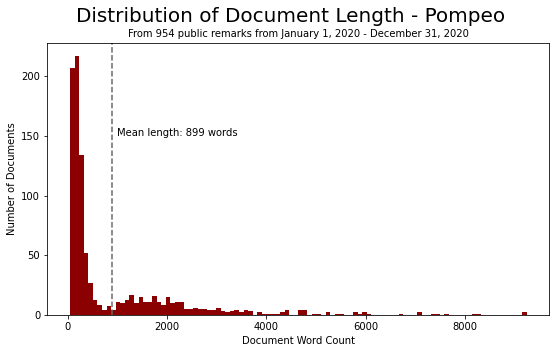

In [10]:
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(pompeo_2020.content_length, bins = 100, color = 'darkred')
ax.text(1000, 150, 'Mean length: 899 words')
plt.axvline(x = 899, color = 'dimgrey',ls = 'dashed')
plt.title('From 954 public remarks from January 1, 2020 - December 31, 2020', size = 10)
plt.suptitle('Distribution of Document Length - Pompeo', size = 20)
plt.xlabel('Document Word Count')
plt.ylabel('Number of Documents')
# fig.savefig('pompeo2020_hist.png')

In [347]:
# see how many documents are greater than mean 
greater_mean_pompeo = len(pompeo_2020[pompeo_2020.content_length > 899]) 
greater_mean_pompeo
print(str(round((greater_mean_pompeo/len(pompeo_2020)*100),2)) + ' percent of documents are > mean 899 words')

285

29.87 percent of documents are > mean 899 words
